# Lab 1 - El Niño Analysis

By: Matt McCormack 

Date: 3/6/2021

***

## Introduction

The purpose of this lab is to familiarize ourselves with both R and time series data, by reproducing parts of the Lam et al. paper about El Niño Southern Oscillation cycle, which is described below. Doing this in our own R environment is good practice for using R for time series analysis. To complete this lab, we loaded the data used in the discussion paper into R data frames and converted the data into a time-series. After the data was formatted correctly, we analyzed the data using a variety of tools from the 'tswge' package (Woodward, W. (2016). tswge: Applied Time Series Analysis.). Using the tswge package helped us further investigate ENSO Cycles for ourselves and identify periodic or aperiodic behavior. The Lam et al. paper uses the ONI and MEI ENSO indices for analysis; for this lab I use the same data, which I have linked at the beginning of each section of the methods. I also used a separate data set that I thought would have similar trends, for which I chose GDP. Below are an initial review of the discussion paper, as well as my own methods, results, and conclusions.

## Initial review of the discussion paper - summary of the objective, methods, and results

### Objective
> The discussion paper, which is titled "Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle", had a main objective of exploring how ENSO is linked to global, regional and country-level rates of people affected by natural disasters (PAD) and public health issues (Lam, Haines, McGregor, Chan, Hajat 1). By looking at the effects of natural disasters on people, we can assess how ENSO might impact public health around the world in ways such as injuries, malnourishment, and hygenic issues. 

### Methods
> The researcher's methods included time-series regression, which was used to assess de-trended associations between PAD and ENSO indices; the two most used of these indices were the Oceanic Niño Index (ONI) and the multivariate El Niño Index (MEI). The PAD rate was calculated by dividing the number of people affected by the population size in the calendar year, the data for which came from the EMDAT dataset. Additionally, the authors of the paper determined that the intensity of El Niño events can be categorized as: very strong (ONI >2), strong (ONI of 1.5-1.9), moderate (ONI 1-1.4), and weak (ONI .5-.9); for La Niña events the negative values were used. Years with -.5 to .5 ONI were neutral (Lam, Haines, McGregor, Chan, Hajat 4). For a year to be classified as an El Niño year, there had to be least 5 months straight of an ONI greater than .5.

### Results
> The results from the study showed that "over 95% of PAD were caused by floods, droughts or storms, with over 75% of people affected by these three disasters residing in Asia. Globally, drought-related PAD rate increased sharply in El Niño years (versus neutral years). Flood events were the disaster type most strongly associated
with El Niño regionally" (Lam, Haines, McGregor, Chan, Hajat 1). Overall, their results "are suggestive of an association between El Niño and La Niña events and PAD at the global level, although with considerable heterogeneity according to disaster type" (Lam, Haines, McGregor, Chan, Hajat 9).


## Methods



### Install/Load the Necessary Packages
We begin by installing both the tidyverse package, which gives us many helpful data manipulation tools, and the tswge package, which will help us visualize our results later.

In [1]:
#install and load packages:
install.packages('tidyverse')
install.packages('tswge')
library('tidyverse')
library('tswge')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Load in/Format the ONI Data, and Plot the Time Series
Tabularized Oceanic Niño Index (ONI) data from NOAA (Link: https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt )

Code from: Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Reading and processing data for Lab 1.

In [124]:
# ONI data: Define the URL, scrub the file name from the URL and download to /tmp
oni_url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni_name <- tail(unlist(strsplit(oni_url, "/")), n=1)
oni_file <- paste("/tmp/", oni_name, sep="")
download.file(oni_url, oni_file, method = 'auto')

oni_df <- read.table(oni_file, header = TRUE)
oni_ts <- ts(oni_df$ANOM, start = c(1950, 1), frequency = 12)

### Load in/Format the MEI Data, and Plot the Time Series
Multi-variate ENSO Index (MEI) data (Link: https://psl.noaa.gov/enso/mei.old/table.html )

Code for this was from: Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Reading and processing data for Lab 1.

In [125]:
# MEI data: Define the URL, scrub the file name, and download it to /tmp
mei_url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei_name <- tail(unlist(strsplit(mei_url, "/")), n=1)
mei_file <- paste("/tmp/", mei_name, sep="")
download.file(mei_url, mei_file, method = 'auto')

a <- readLines(mei_file)
for (my_line in a){
  a <- grep("^YEAR.*", my_line)
  if (length(a) > 0) {
    my_cols <- unlist(strsplit(my_line, "\\s+"))
  }
}

# Create an empty dataframe
n_cols <- length(my_cols)
mei_df <- data.frame(matrix(ncol = n_cols, nrow = 0))
colnames(mei_df) <- my_cols

a <- readLines(mei_file)
for (my_line in a){
  a <- grep("^[0-9].*", my_line)
  if (length(a) > 0) {
    my_data <- unlist(strsplit(my_line, "\\s+"))
    num_data <- length(my_data)
    if (num_data == n_cols) {
      my_values <- c()
      for (d in my_data) {
        my_values <- append(my_values, as.numeric(d))
      }
      mei_df[nrow(mei_df)+1,] = my_values
    }
  }
}

mei_ts <- ts(as.vector(t(mei_df[,2:length(my_cols)])), start = c(1950, 1), frequency = 12)
#plot(mei_ts, main = "Two-month running average MEI")


### Load in/Format the PAD/Population Data, and Plot the Time Series
* Persons Affected by Disasters (PAD) data from EM DAT (Link: https://public.emdat.be/ )
*Population Data from Worldbank (Link: http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv )

Code for this was from: Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Reading and processing data for Lab 1.

In [126]:
#Load in PAD data and filter for columns we want.

# Manually download/drag and drop the data emdat_public.csv into tmp;
#Otherwise, this code will not work.

pad_file <- "/tmp/emdat_public.csv"
pad_df_all <- read.csv(pad_file, header=TRUE, skip=6)
pad_df <- pad_df_all[c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Affected")]

wbank_url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank_name <- "world_bank.zip"
wbank_file <- paste("/tmp/", wbank_name, sep="")
download.file(wbank_url, wbank_file)

unzip(zipfile = wbank_file, exdir = "/tmp")

my_file <- ""
for (tmp_file in list.files("/tmp")){
  a <- grep("^API_SP.POP.TOTL.*csv", tmp_file)
  if (length(a) > 0) {
    my_file <- tmp_file
  }
}
print(my_file)

# Add the path back to the file name
wb_file <- paste("/tmp/", my_file, sep="")
wb_df <- read.csv(wb_file, header = TRUE, skip = 4)
rownames(wb_df) <- wb_df$Country.Code

# Loop through each row of our data frame and
# find the matching country and year
# remember that year columns in World Bank start with "X"
# and save the population to the original pad dataframe.
for (i in 1:nrow(pad_df)) {
  # Remember i is the row index in pad.df
  tmp_iso <- pad_df[i, ][['ISO']]
  tmp_year <- pad_df[i, ][['Start.Year']]
  tmp_col <- paste("X", tmp_year, sep="")
  # Match returns "NA" if no match
  a <- match(tmp_iso, wb_df$Country.Code)
  if (!is.na(a)) {
    tmp_pop <- wb_df[,tmp_col][a]
    # We can create new dataframe columns on the fly
    pad_df[i, 'POP'] = tmp_pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    # Make sure to assign missing values, too!
    pad_df[i, 'POP'] = NA
    #print(paste("Could not match", tmp_iso))
  }
}

# Calculate the total number of people impacted by disasters in 1964
# Filter out any NA rows/cols

PAD_per1000 <- function (year){
  my_pad <- subset(pad_df, Start.Year == year)
  pad <- 0
  for (i in 1:nrow(my_pad)){
    if (!is.na(my_pad$Total.Affected[i]) & !is.na(my_pad$POP[i])) {
      my_ta <- my_pad$Total.Affected[i]
      my_tp <- my_pad$POP[i]
      pad <- pad + my_ta
    }
  }
  # Find the total population of unique counties impacted by disasters for 1964
  pop <- 0
  for (my_iso in unique(my_pad$ISO)){
    #print(my.iso)
    a <- match(my_iso, my_pad$ISO)
    tmp_pop <- my_pad$POP[a]
    if (!is.na(tmp_pop)) {
      pop <- pop + tmp_pop
    }
  }
  return((pad/pop)*1000)
}

years <- sort(c(unique(pad_df$Start.Year)))
PAD_1000 <- c()
for (year in years){
  PAD_1000 <- c(PAD_1000, PAD_per1000(year))
}
pad_df_final <- data.frame(years, PAD_1000)

pad_ts <- ts(pad_df_final$PAD_1000, start = c(1964), frequency = 1)

[1] "API_SP.POP.TOTL_DS2_en_csv_v2_2106202.csv"


### Find El Niño Years

In [127]:
# An El Niño year, as defined above,is when there are 5+ months of an ONI of
# .5 or above; so, lets filter the data with .5 as the cutoff for El Niño
# (Lam, Haines, McGregor, Chan, Hajat 9)

oni_df$elnino <- oni_df$ANOM > .5

elninoyr <- c()
years <- unique(oni_df$YR)
#iterate over every unique year; check with a counter if the year has 5+ months
#with an ONI of .5+; if yes, put a 1 for that year; if not, put a zero
for (year in years){
  yr_nums <- filter(oni_df, YR==year)
  if (sum(yr_nums$elnino) <5){
    elninoyr <- c(elninoyr, 0)
  }
  else{
    counter <- 0
    for (i in yr_nums$elnino){
      if (i==TRUE){
        counter <- counter+1
        if (counter==5){
          elninoyr <- c(elninoyr, 1)
        }
      }
      if (i==FALSE){
        counter <- 0
      }
    }
  }
}

elninoyr_df <- data.frame(years[1:71], elninoyr)

### Load in/Format Yearly GDP Data
GDP data from worldbank (link: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv )

Methods semi-adapted from: Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Reading and processing data for Lab 1.

In [128]:
# Global GDP % change data: Define the URL, scrub the file name, and download it to /tmp
wbank_url <- "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv"
wbank_name <- "worldbank.zip"
wbank_file <- paste("/tmp/", wbank_name, sep="")
download.file(wbank_url, wbank_file)

unzip(zipfile = wbank_file, exdir = "/tmp")

for (tmp_file in list.files("/tmp")){
  a <- grep("^API_NY.GDP.MKTP.*csv", tmp_file)
  if (length(a) > 0) {
    my_file <- tmp_file
  }
}
print(my_file)

gdp_file <- paste("/tmp/", my_file, sep="")
gdp_df <- read.csv(gdp_file, header = TRUE, skip = 4)
rownames(gdp_df) <- gdp_df$Country.Code

years_vec <- c()
gdp_vec <- c()

for (year in colnames(gdp_df)){
  if (grepl("X", year, fixed=TRUE)==TRUE & year!='X'){
    years_vec <- c(years_vec, substr(year, 2, 5))
    gdp_vec <- c(gdp_vec, mean(gdp_df[,year], na.rm = TRUE))
  }
}

gdp_df_final <- data.frame(years_vec, gdp_vec)
gdp_df_final <- drop_na(gdp_df_final)

[1] "API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv"


## Results
Now that we have the data loaded in and formatted as time series, we can use tools such as the periodogram and autocorrelation plots to analyze the data.

#### Figure 1 replication from Lam et al.

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”
Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”


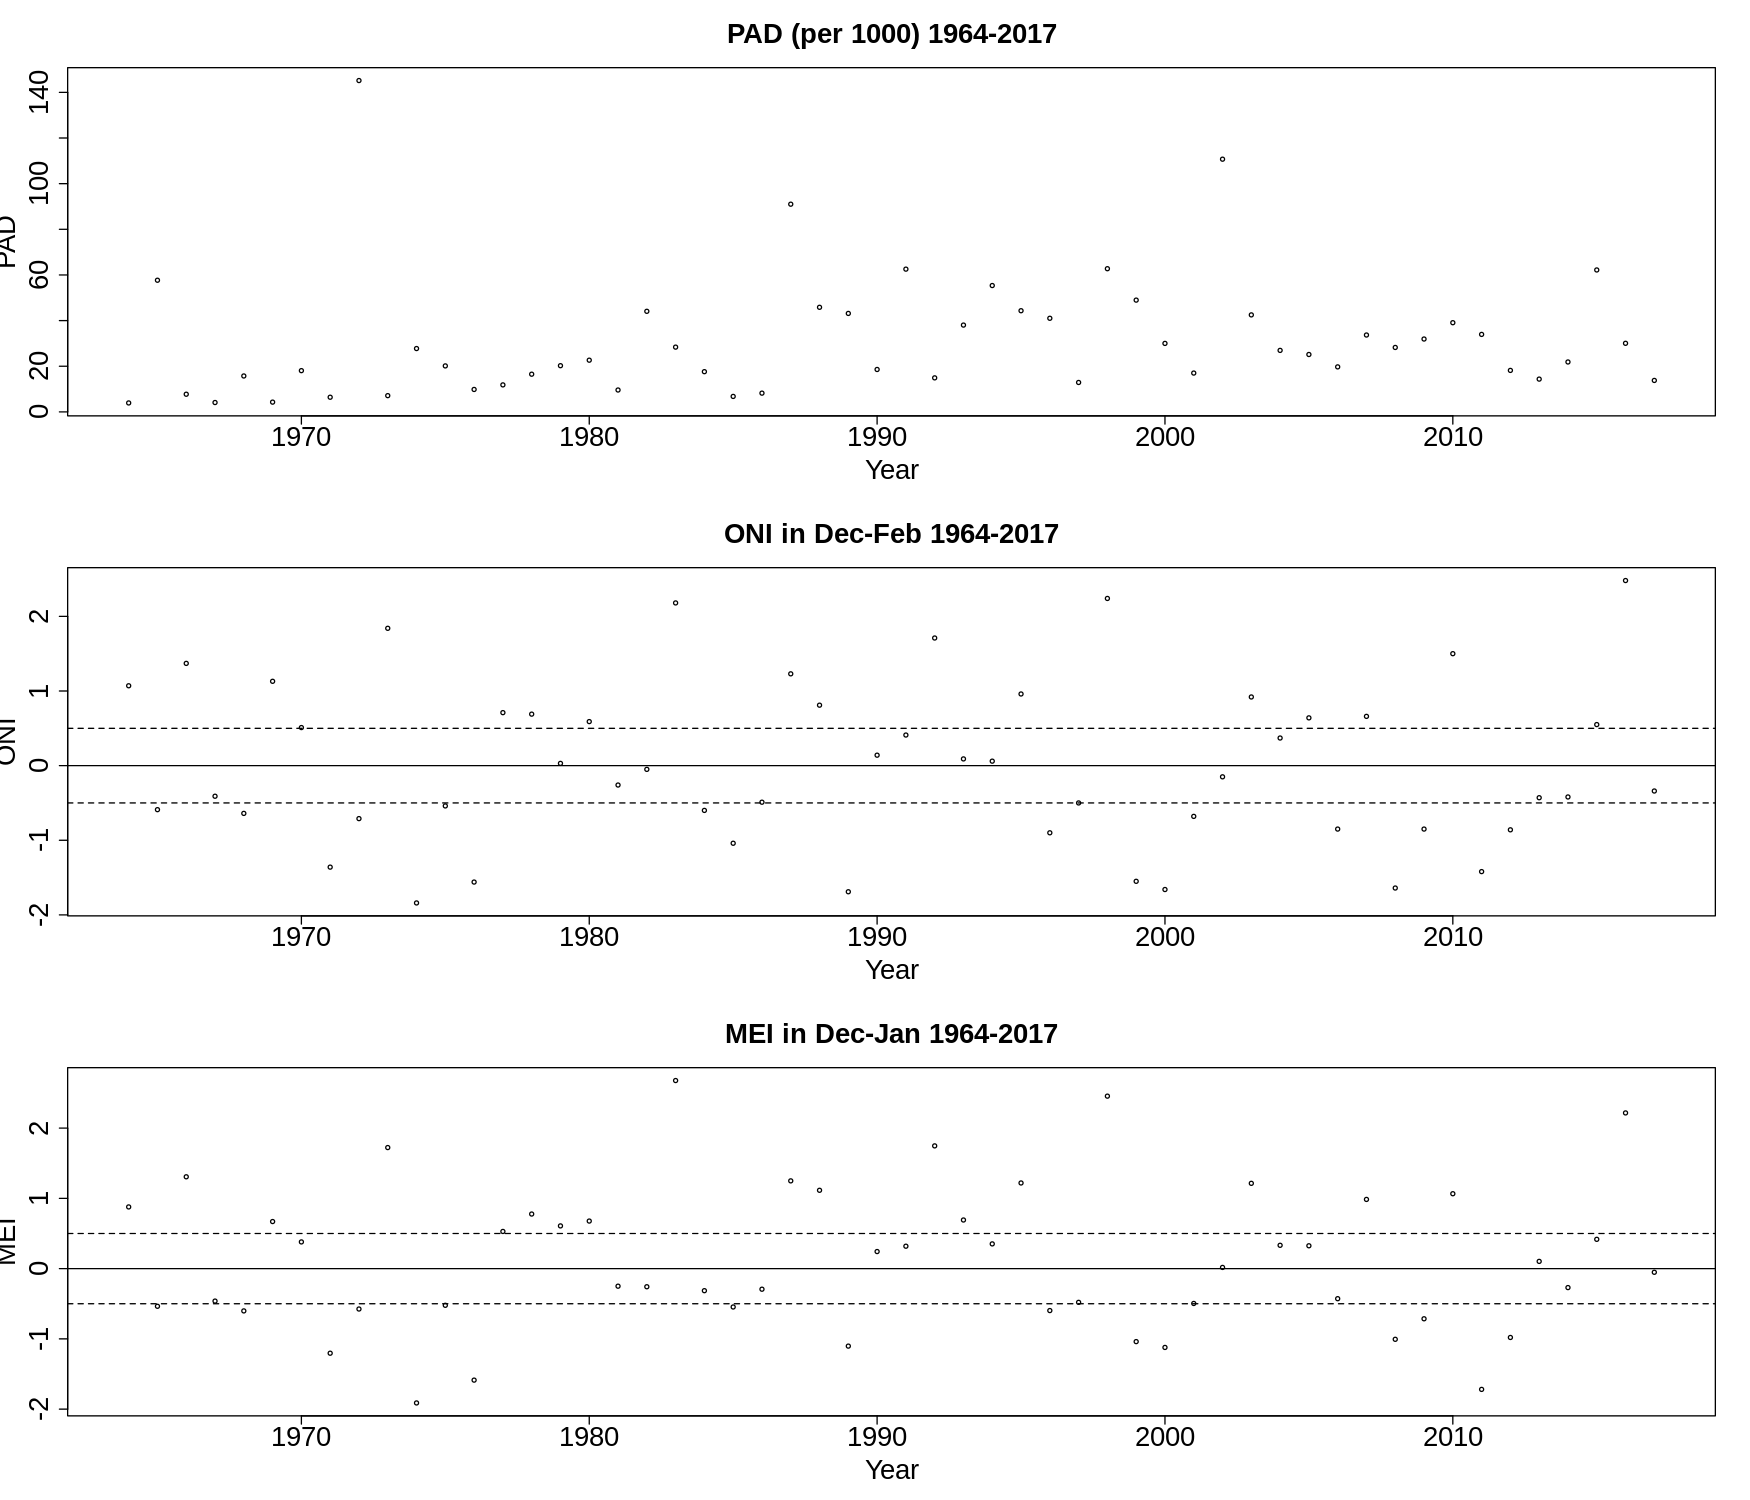

In [129]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)

#oni
oni_decfeb <- filter(oni_df, oni_df$SEAS=='DJF', oni_df$YR>=1964, oni_df$YR<=2017)
oni_decfeb_ts <- ts(oni_decfeb$ANOM, start = c(1964), frequency = 1)

#mei
mei_decjan <- filter(mei_df, mei_df$YEAR>=1964, mei_df$YEAR<=2017)
mei_decjan <- select(mei_decjan, 'DECJAN')
mei_decjan_ts <- ts(mei_decjan$DECJAN, start = c(1964), frequency = 1)

#pad


par(mfrow = c(3,1), cex.main =  2, cex.lab = 2, cex.axis = 2)

plot(pad_ts, main = "PAD (per 1000) 1964-2017", type='p', xlab = 'Year', ylab = 'PAD')

plot(oni_decfeb_ts, type = 'p', xlab = 'Year', ylab = 'ONI', main = "ONI in Dec-Feb 1964-2017")
abline(h=0)
abline(h=.5, type='dashed', lty=2)
abline(h=-.5, type='dashed', lty=2)

plot(mei_decjan_ts, main = "MEI in Dec-Jan 1964-2017", type='p',  xlab = 'Year', ylab = 'MEI')
abline(h=0)
abline(h=.5, type='dashed', lty=2)
abline(h=-.5, type='dashed', lty=2)

### ONI Analysis

#### ONI Realization Plot

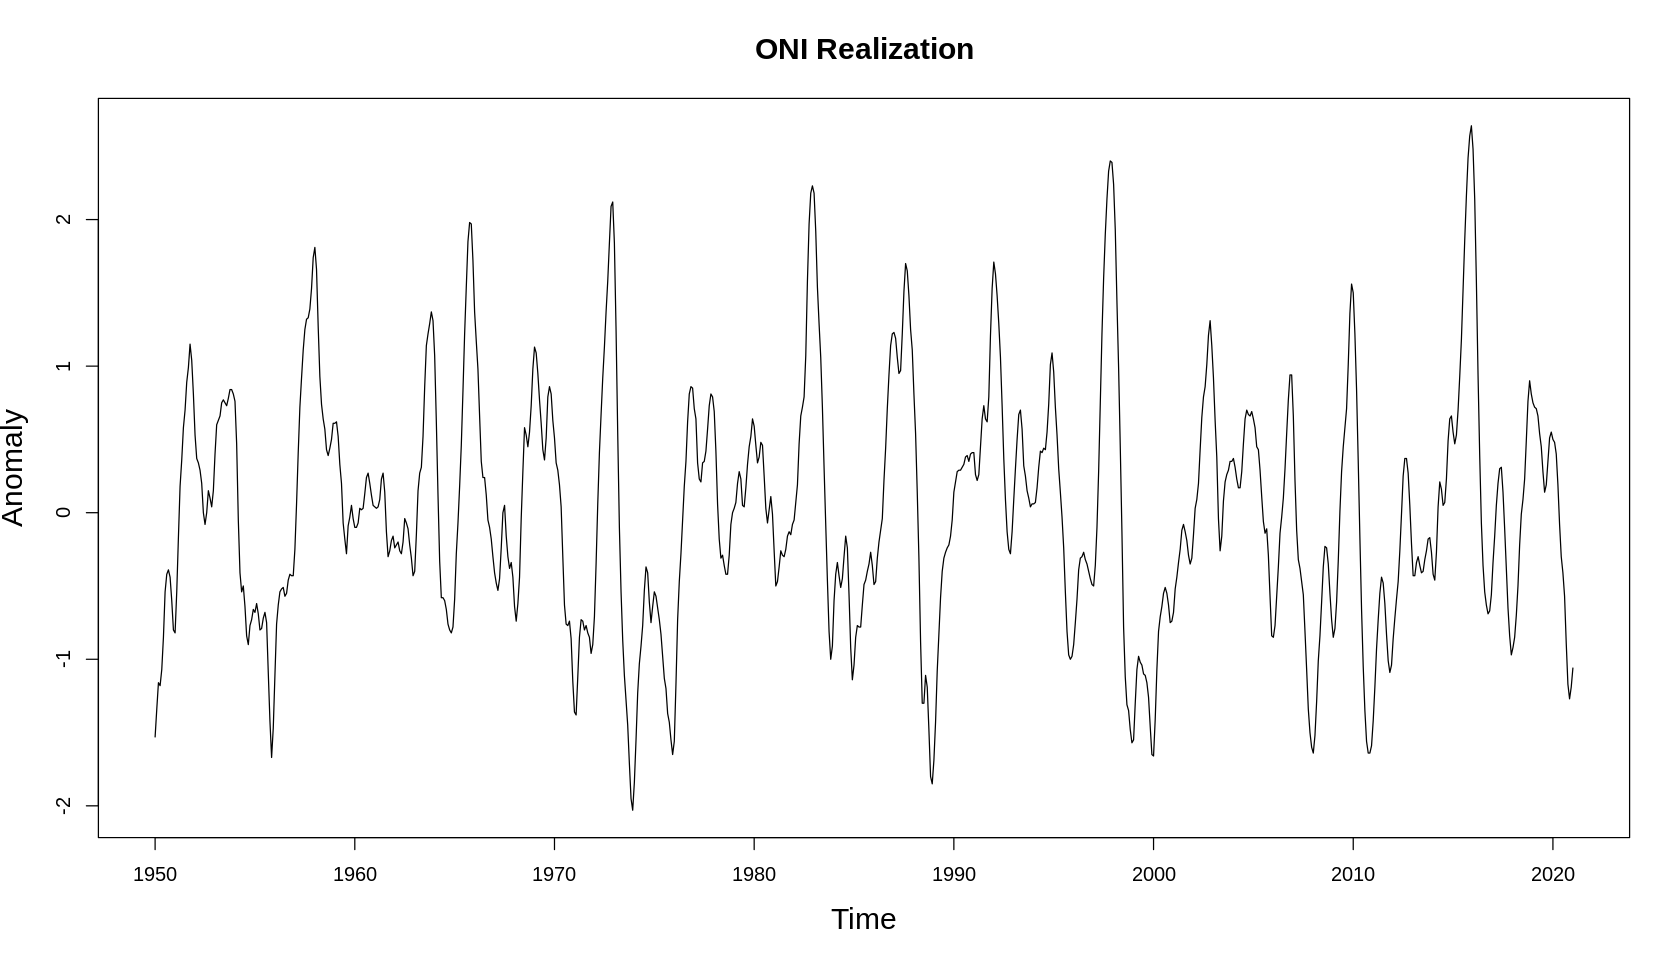

In [130]:
#ONI Realization
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5, cex.sub = 1.5)
plot(oni_ts, main = "ONI Realization", xlab='Time', ylab='Anomaly')

#### ONI Autocorrelation Plot

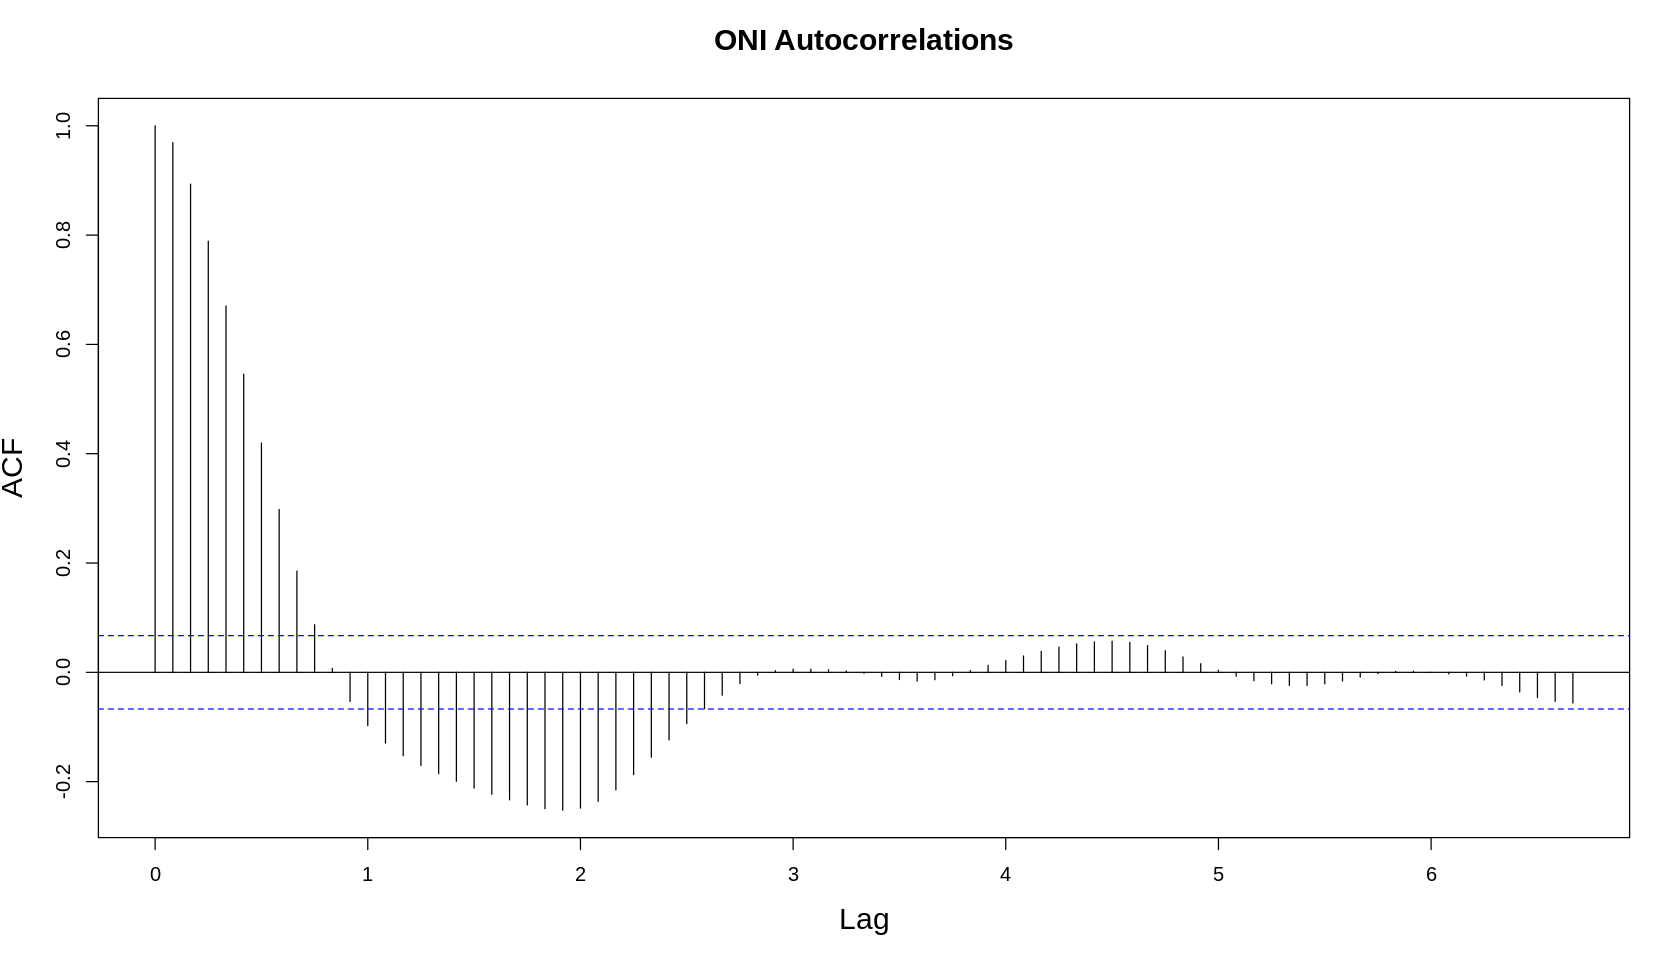

In [131]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
acf(oni_ts, main='ONI Autocorrelations', lag.max=80)

#### ONI Periodogram

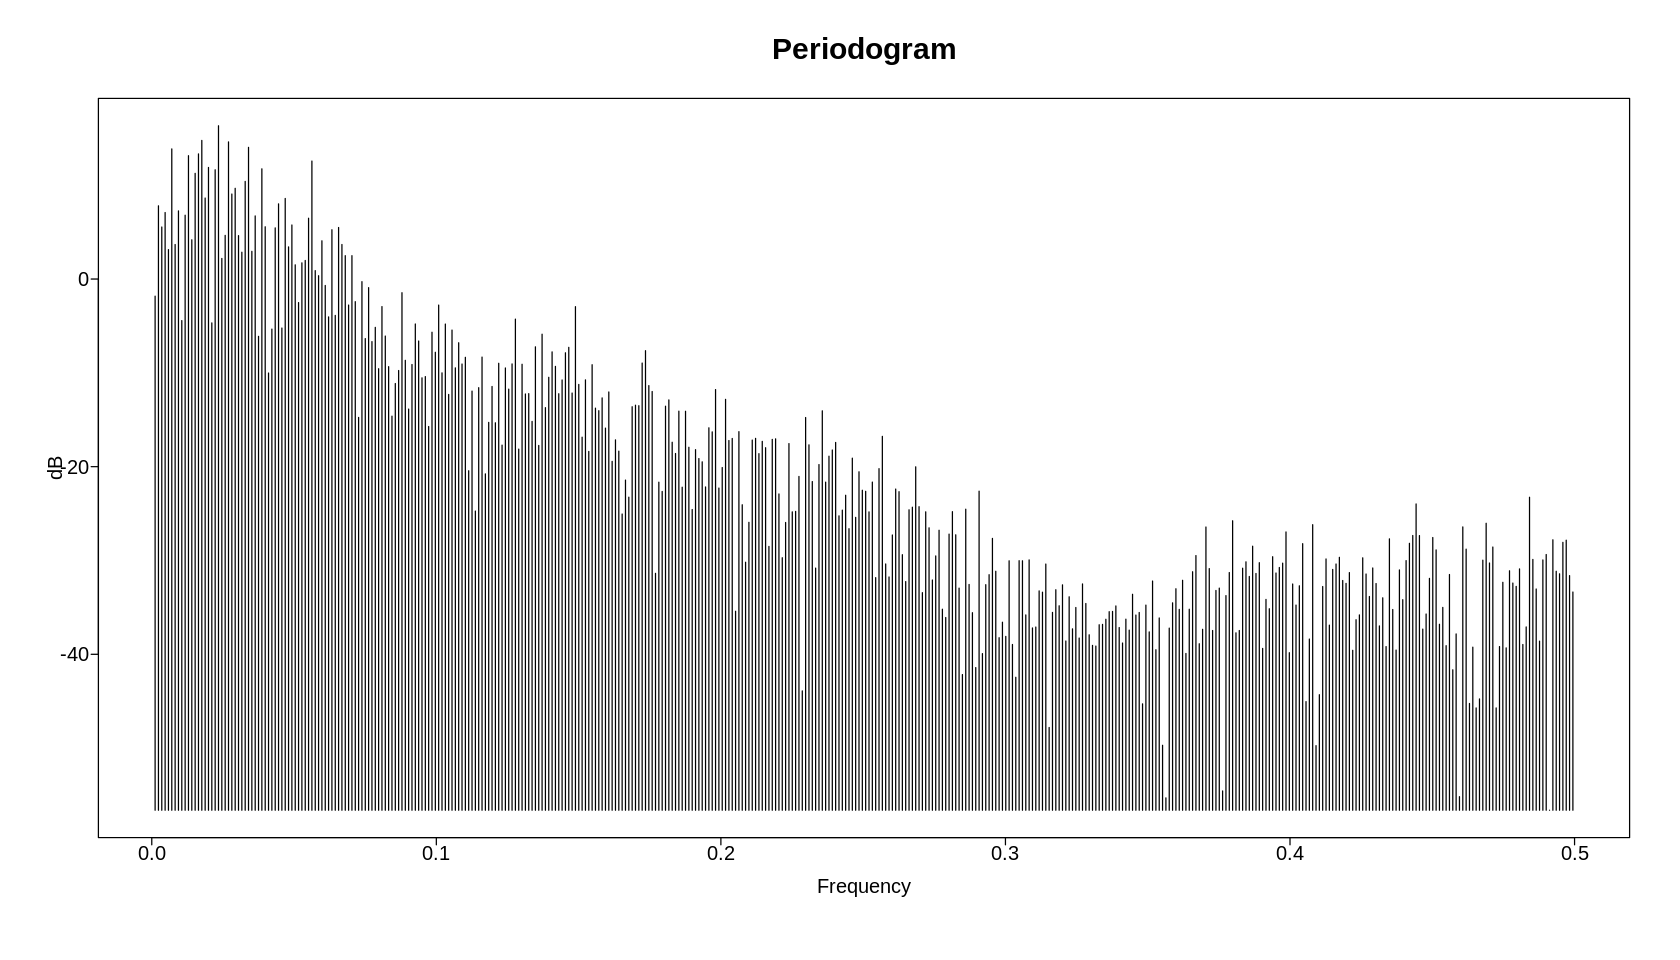

In [132]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
oni_period <- period.wge(oni_ts)

#### ONI Parzen Window

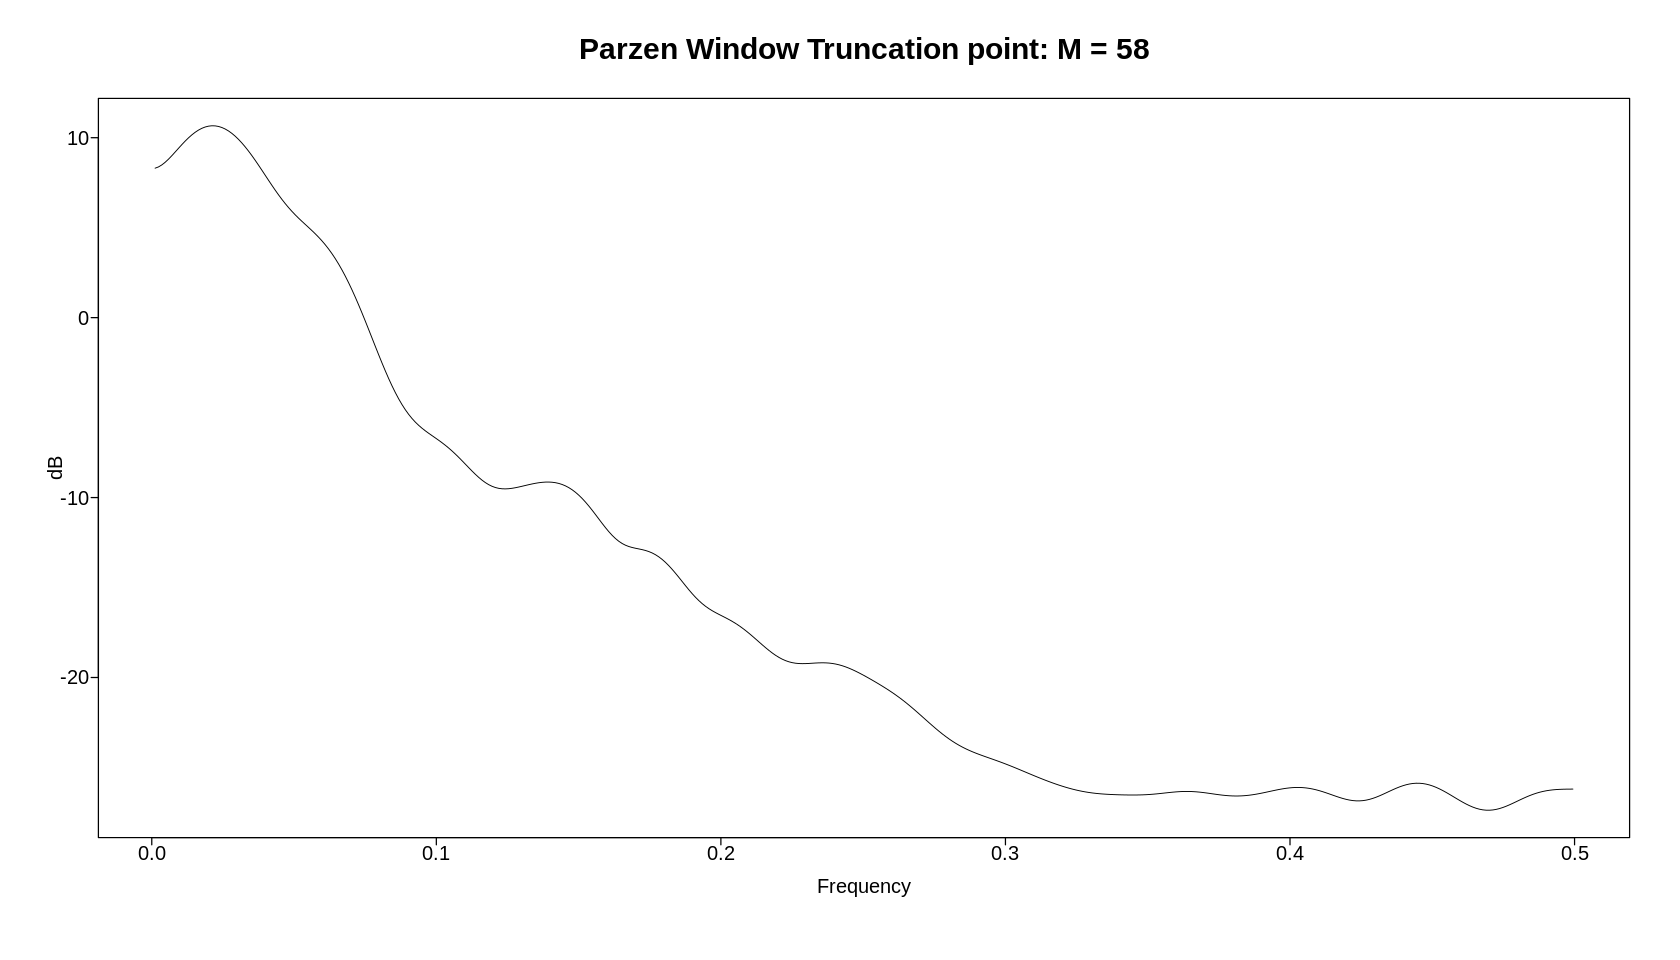

In [133]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
oni_par <- parzen.wge(oni_ts)

#### ONI Periodic/APeriodic Behavior

In [134]:
cat("Period of ONI: ", 1/oni_period$freq[which.max(oni_period$pgram)])

Period of ONI:  42.65

#### ONI Dominant Frequency

In [135]:
cat("Dominant Frequency of ONI: ", oni_period$freq[which.max(oni_period$pgram)])

Dominant Frequency of ONI:  0.02344666

### MEI Analysis

#### MEI Realization Plot

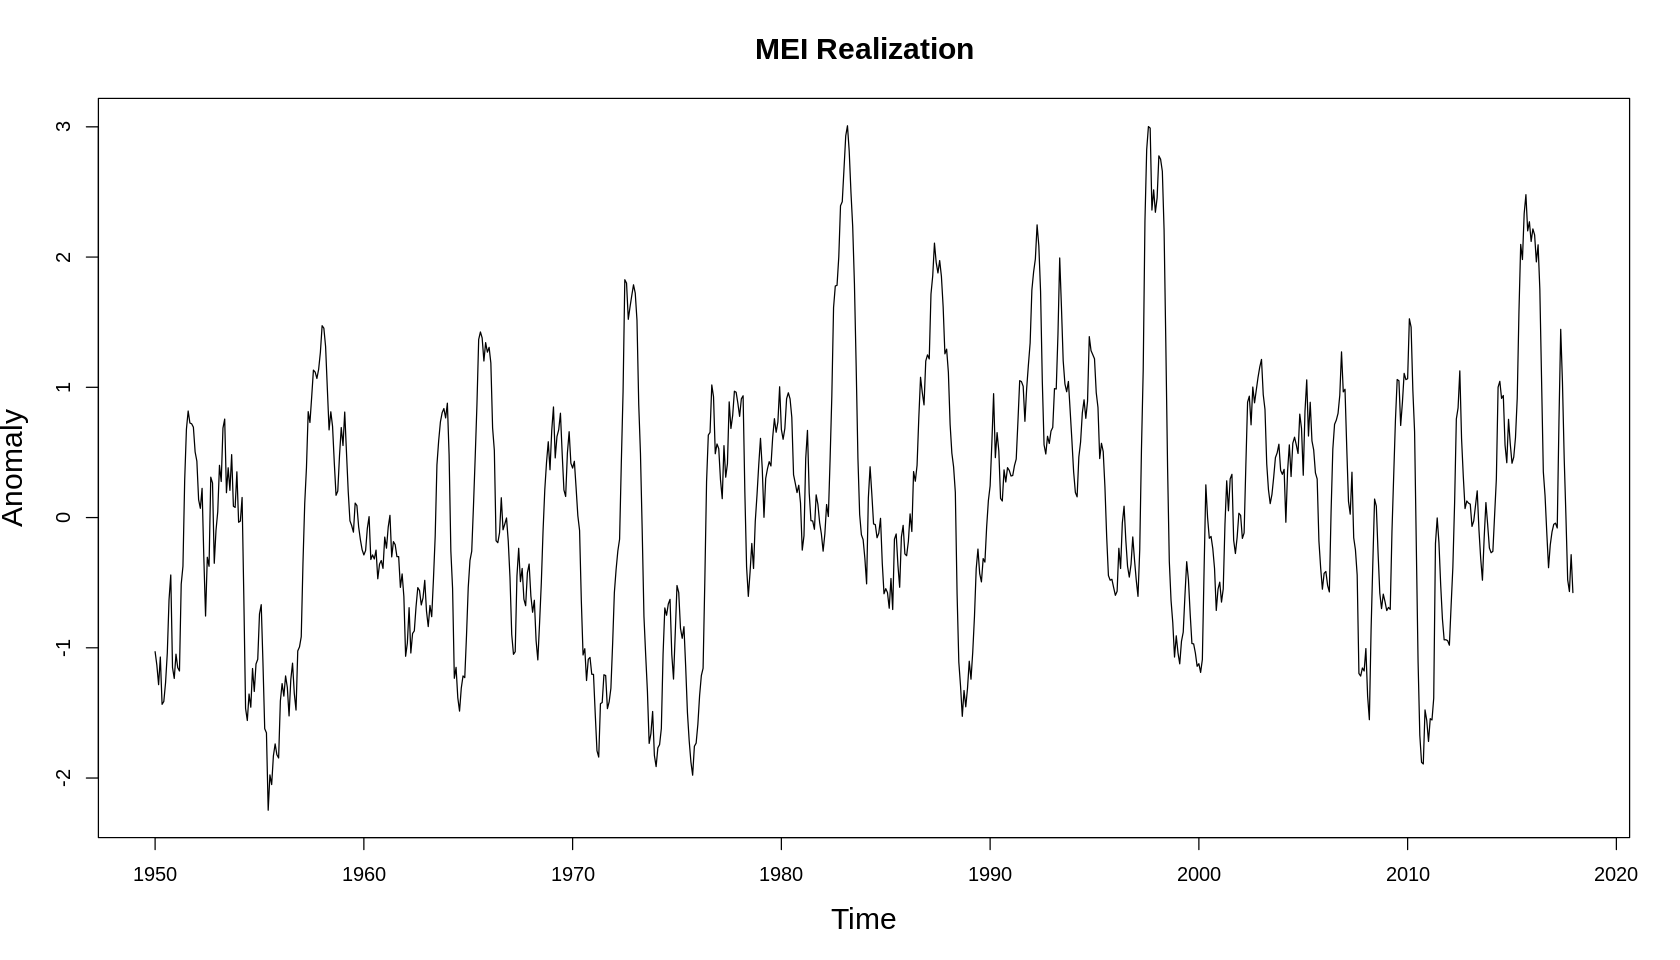

In [136]:
#MEI Realization
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5, cex.sub = 1.5)
plot(mei_ts, main = "MEI Realization", xlab='Time', ylab='Anomaly')

#### MEI Autocorrelation Plot

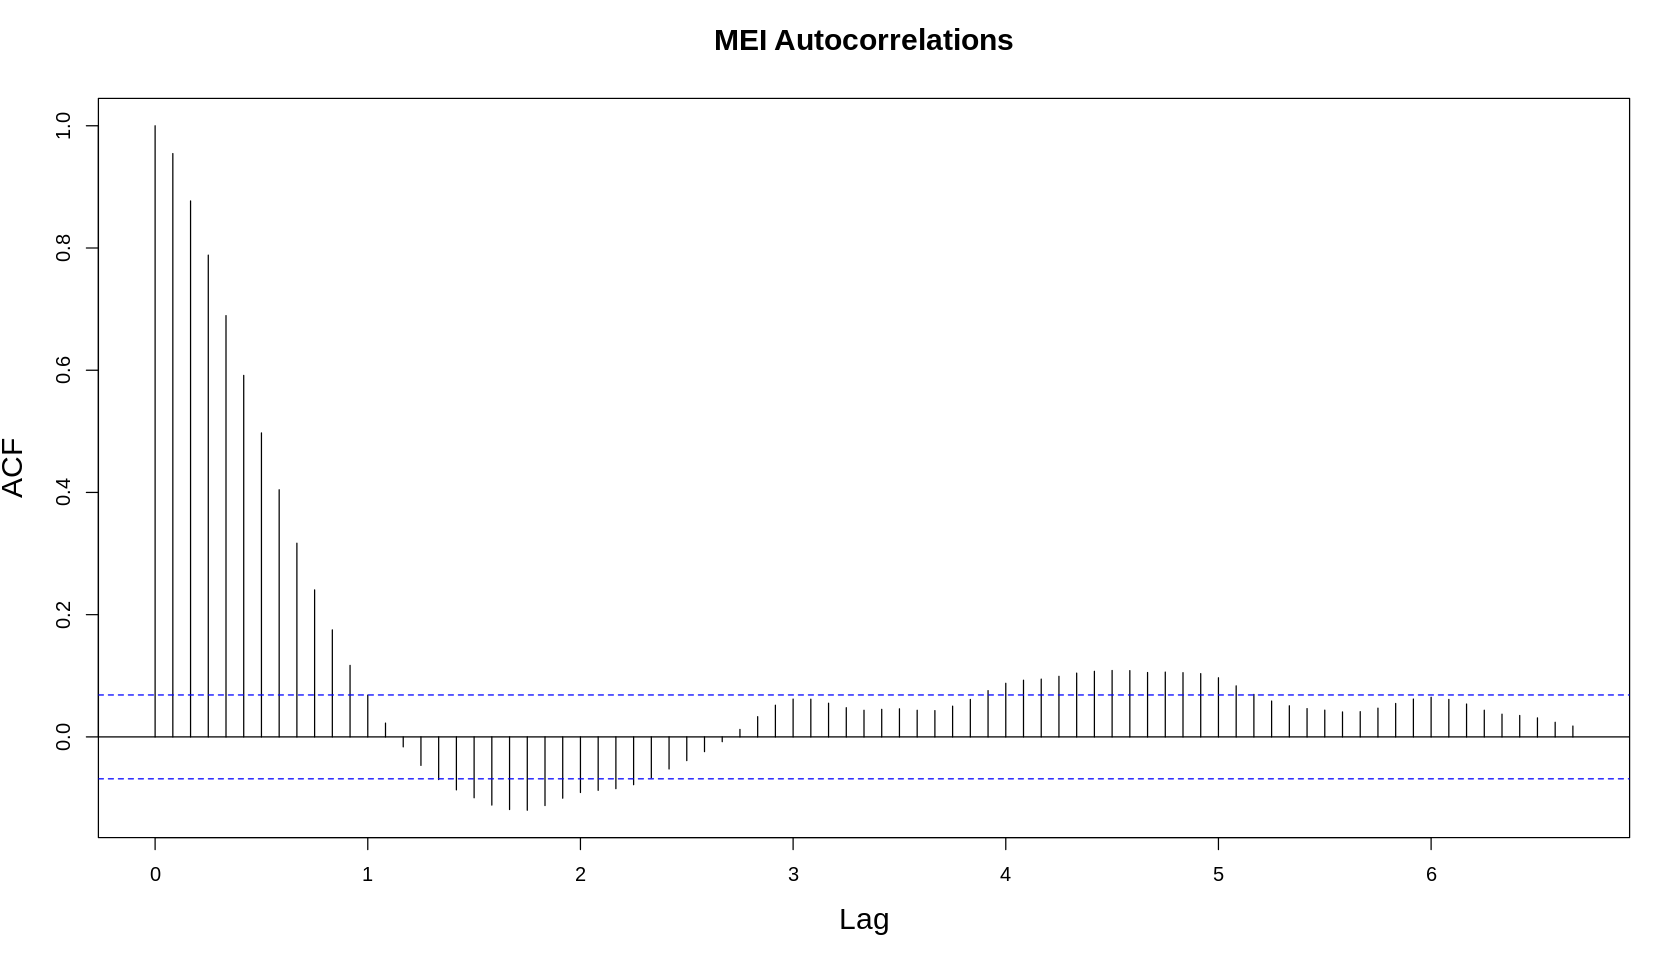

In [137]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
acf(mei_ts, main='MEI Autocorrelations', lag.max=80)

#### MEI Periodogram

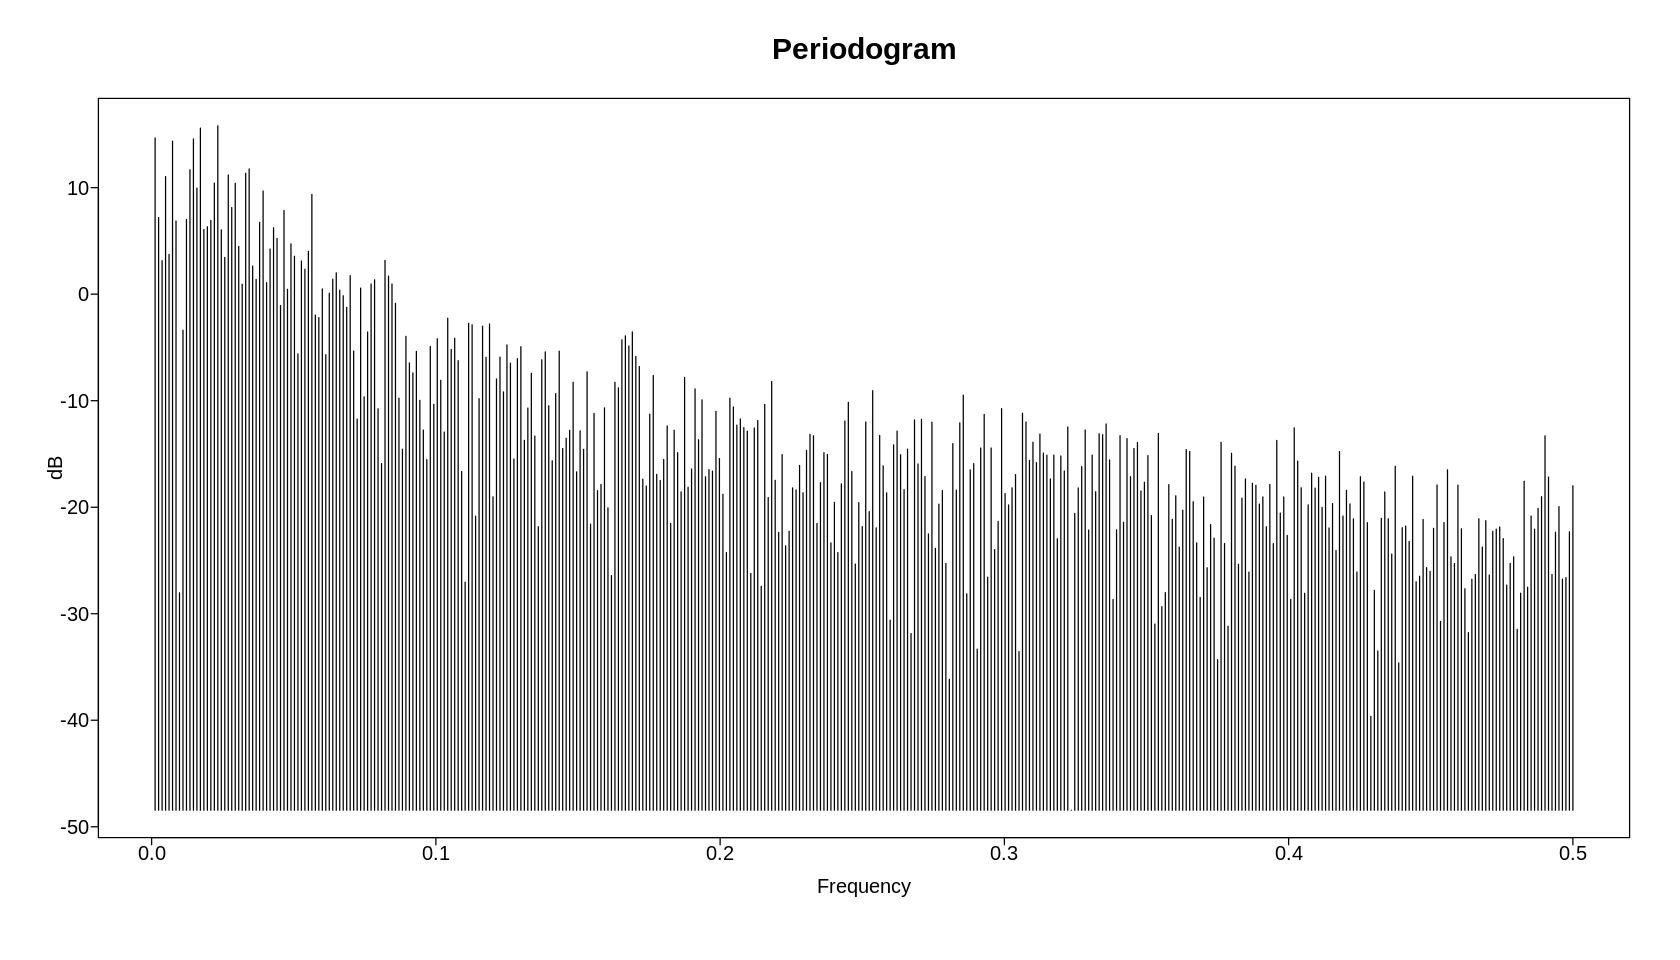

In [138]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
mei_period <- period.wge(mei_ts)

#### MEI Parzen Window

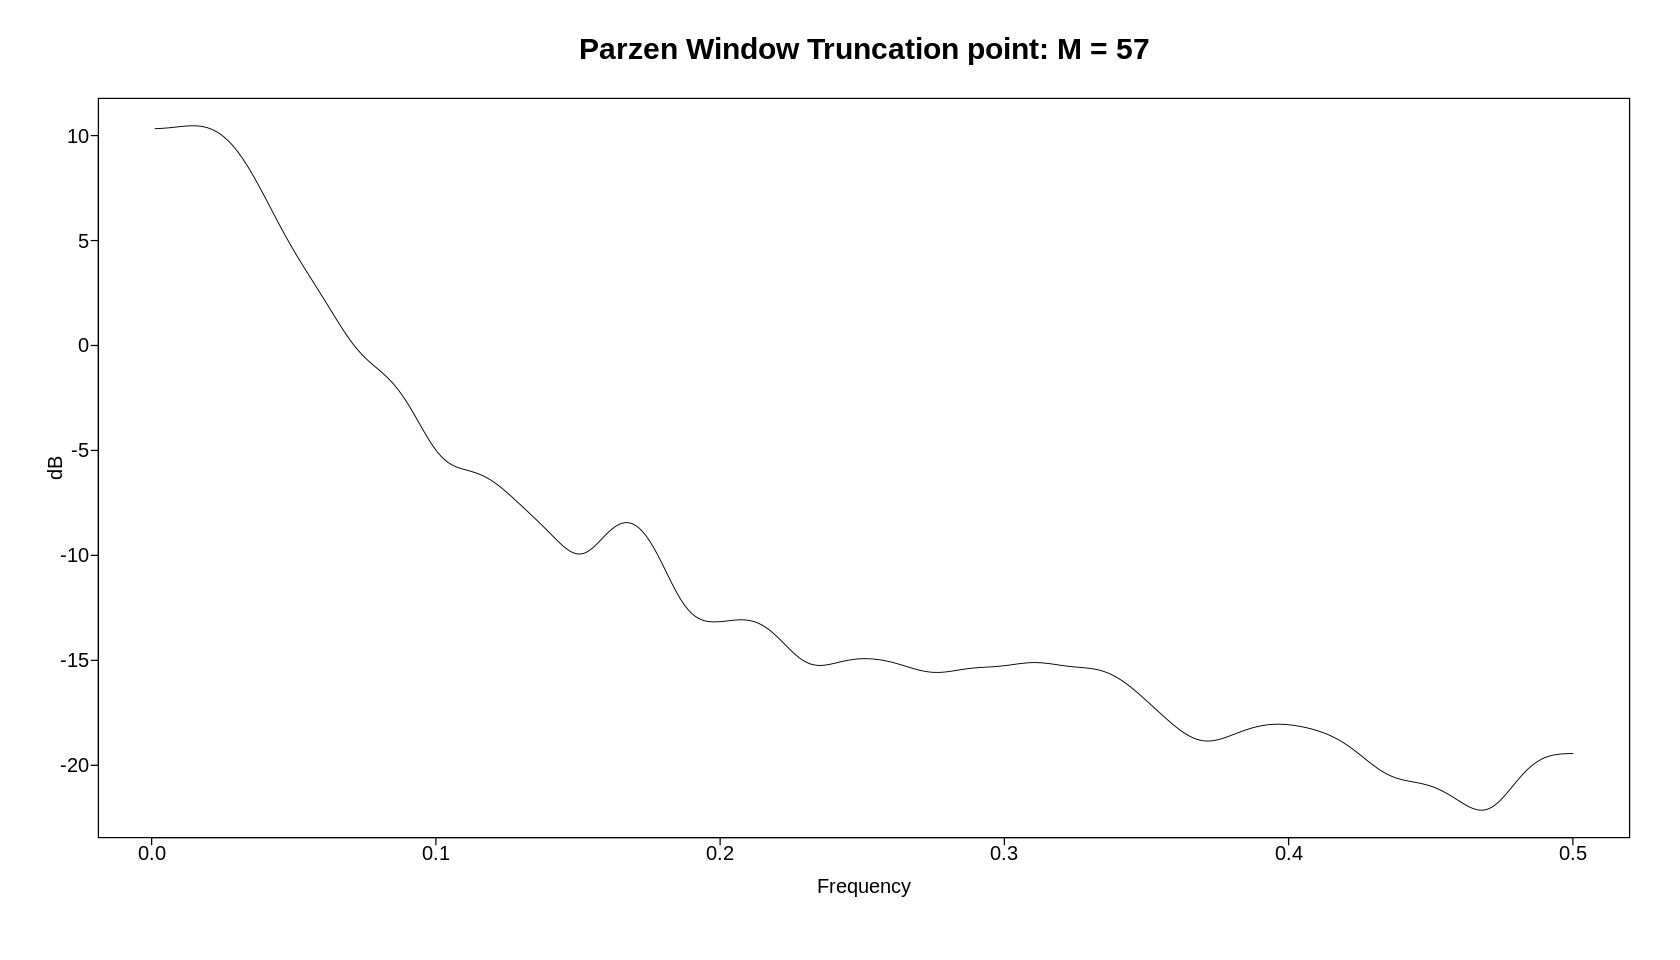

In [139]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
mei_par <- parzen.wge(mei_ts)

#### MEI Periodic/Aperiodic Behavior

In [140]:
max_1 <- which.max(mei_period$pgram)
frequency_1 <- mei_period$freq[max_1]

max_2 <- which.max(mei_period$pgram[0:(max_1-1)])
frequency_2 <- mei_period$freq[max_2]

cat("Period of MEI: ", 1/frequency_1, '\n')
cat("Second period of MEI: ", 1/frequency_2)

Period of MEI:  42.94737 
Second period of MEI:  58.28571

#### MEI Dominant Frequency

In [142]:
cat("Dominant Frequency of MEI: ", frequency_1, '\n')
cat("Second dominant Frequency of MEI: ", frequency_2)

Dominant Frequency of MEI:  0.02328431 
Second dominant Frequency of MEI:  0.01715686

### PAD Analysis

#### PAD Realization Plot

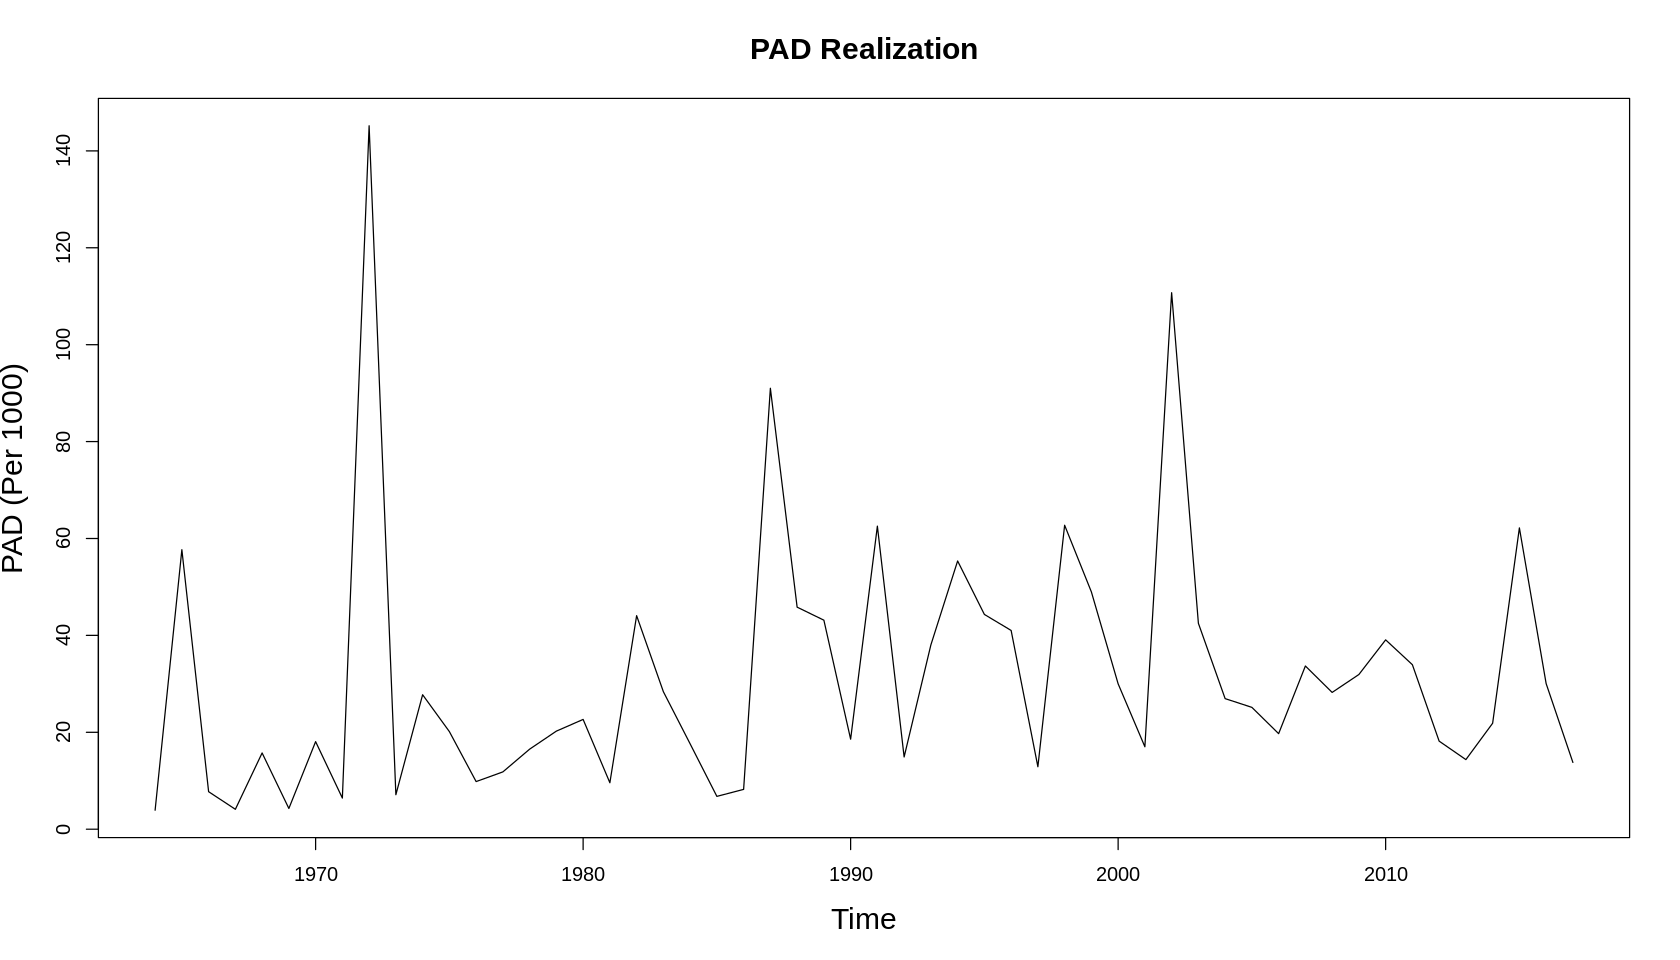

In [143]:
#PAD Realization
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5, cex.sub = 1.5)
plot(pad_ts, main = "PAD Realization", xlab='Time', ylab='PAD (Per 1000)')

#### PAD Autocorrelation Plot

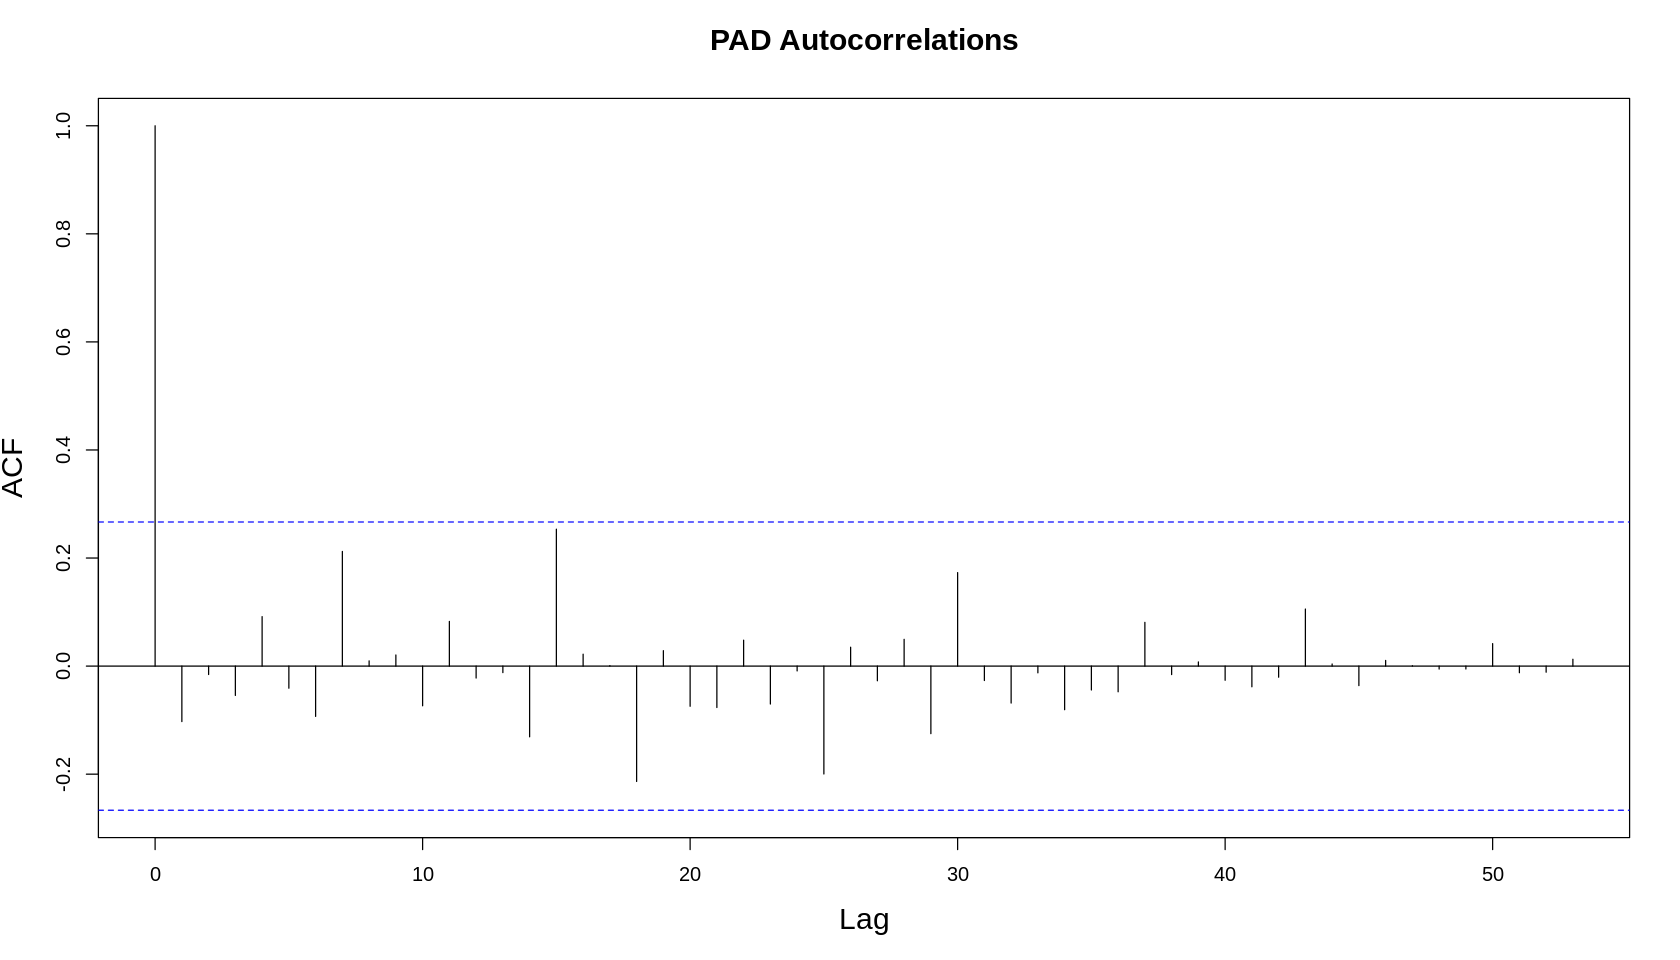

In [144]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
acf(pad_ts, main='PAD Autocorrelations', lag.max=80)

#### PAD Periodogram

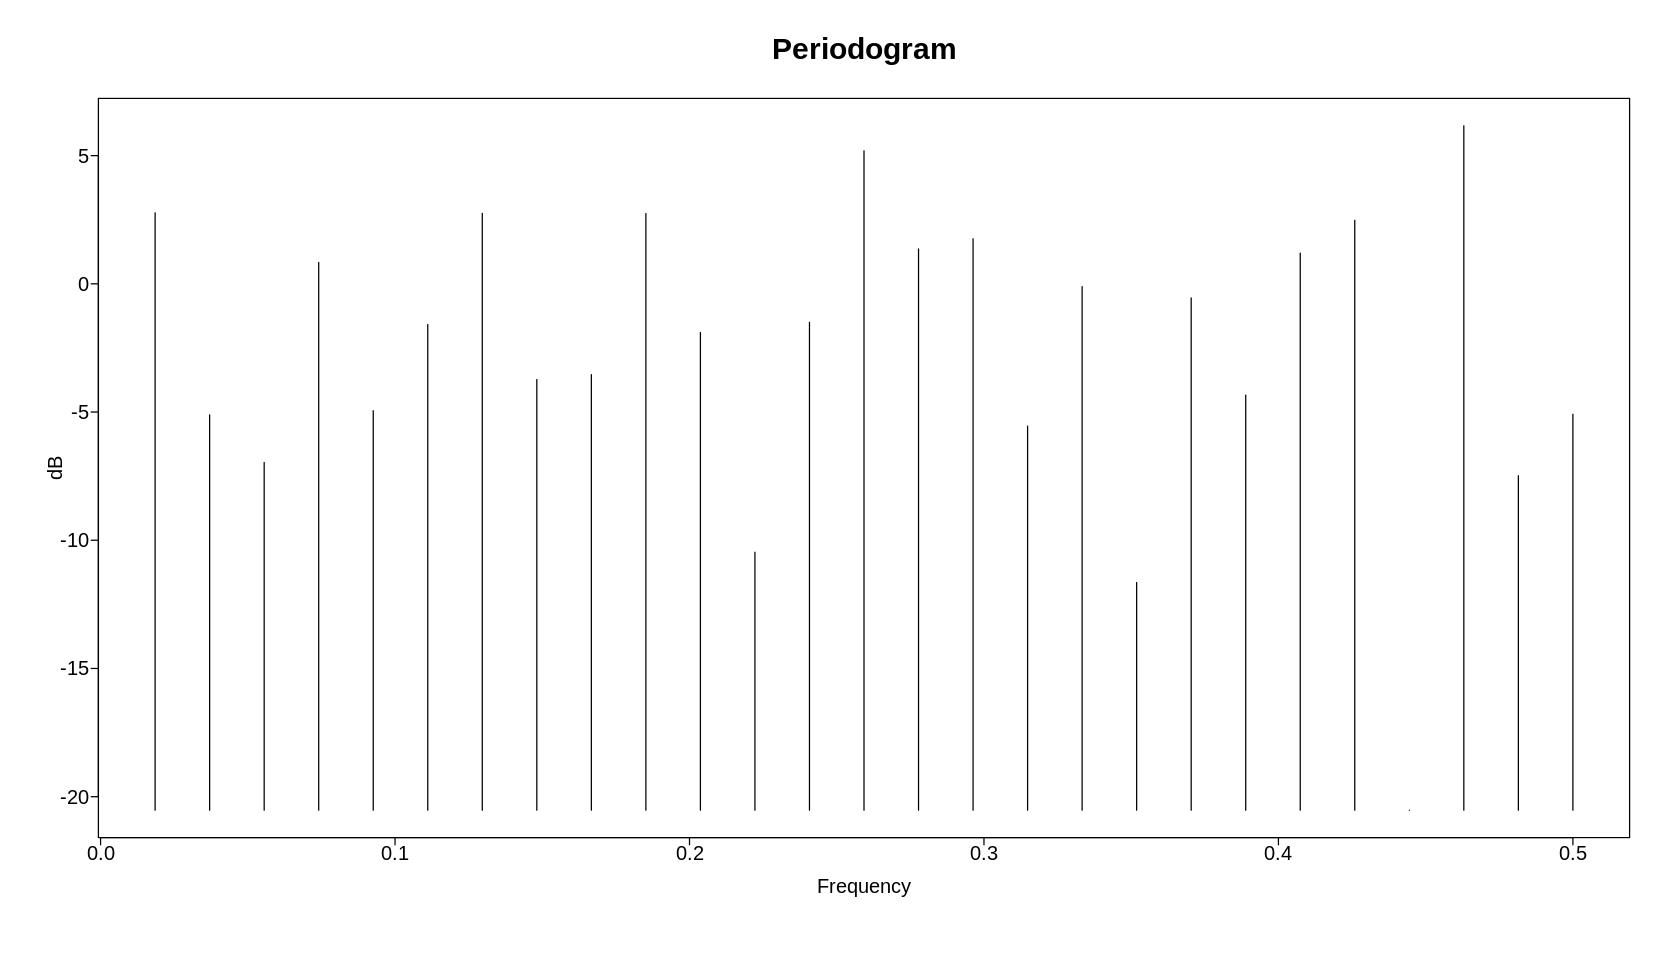

In [146]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
pad_period <- period.wge(pad_ts)

#### PAD Parzen Window

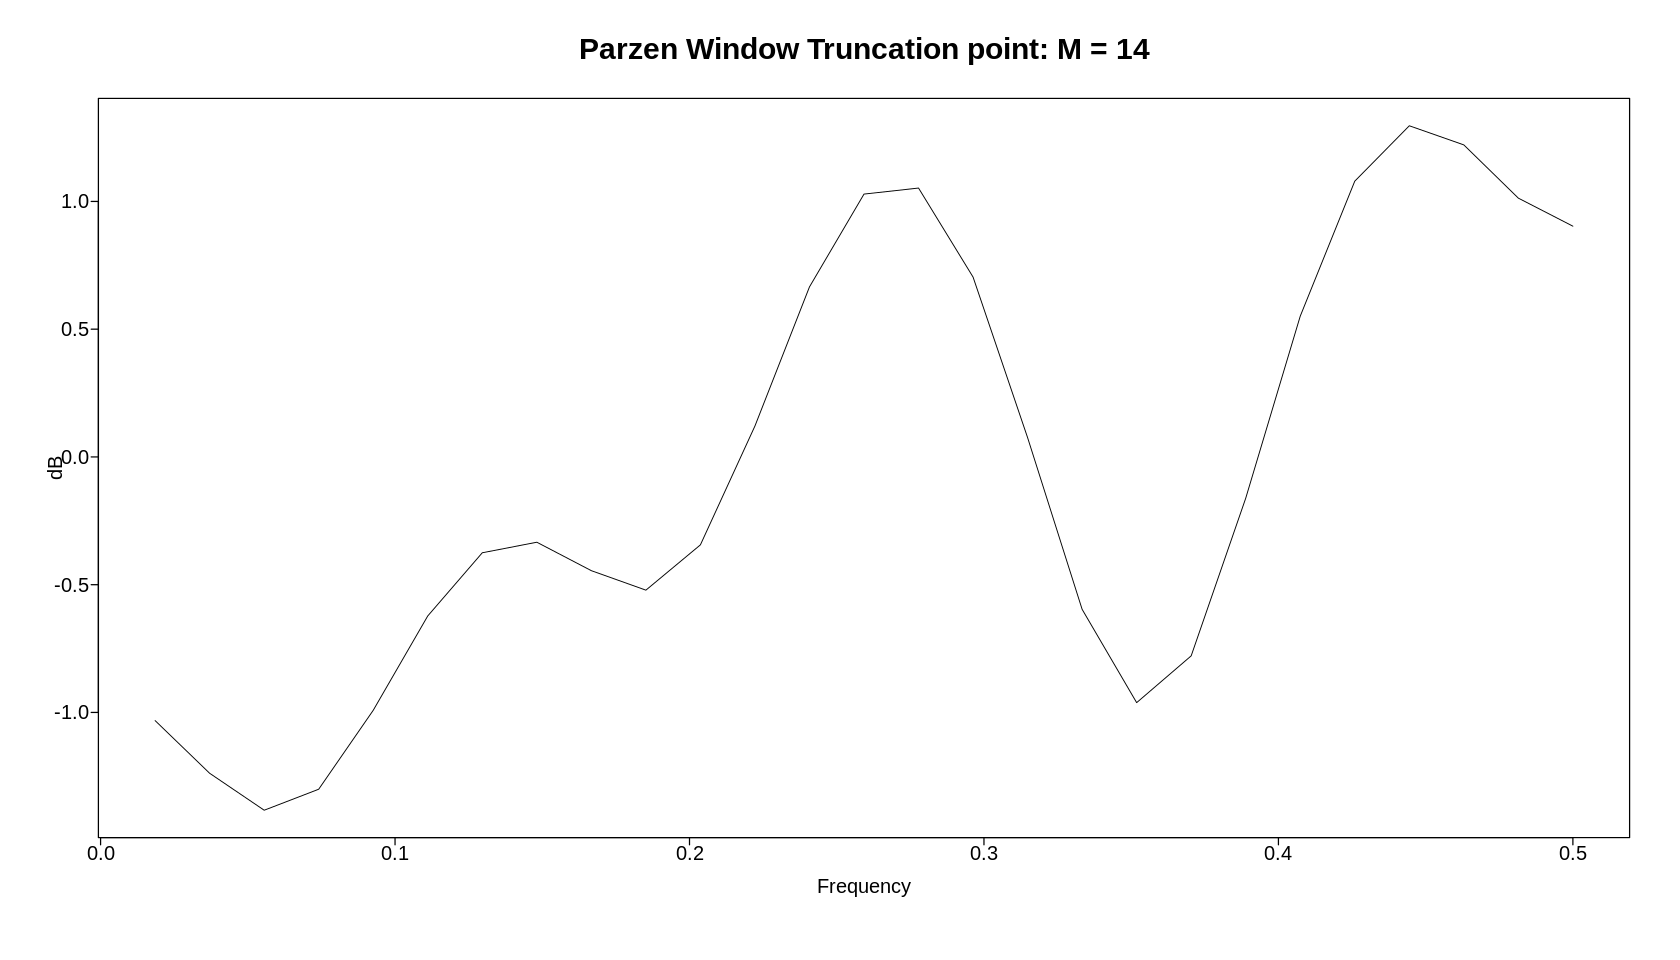

In [147]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
pad_par <- parzen.wge(pad_ts)

#### PAD Periodic/Aperiodic Behavior

In [148]:
max_1 <- which.max(pad_period$pgram)
frequency_1 <- pad_period$freq[max_1]

max_2 <- which.max(pad_period$pgram[0:(max_1-1)])
frequency_2 <- pad_period$freq[max_2]

cat("Period of PAD: ", 1/frequency_1, '\n')
cat("Second period of PAD: ", 1/frequency_2)

Period of PAD:  2.16 
Second period of PAD:  3.857143

#### PAD Dominant Frequency

In [149]:
cat("Dominant Frequency of PAD: ", frequency_1, '\n')
cat("Second dominant Frequency of PAD: ", frequency_2)

Dominant Frequency of PAD:  0.462963 
Second dominant Frequency of PAD:  0.2592593

### El Niño Years

#### El Niño Years Realization Plot

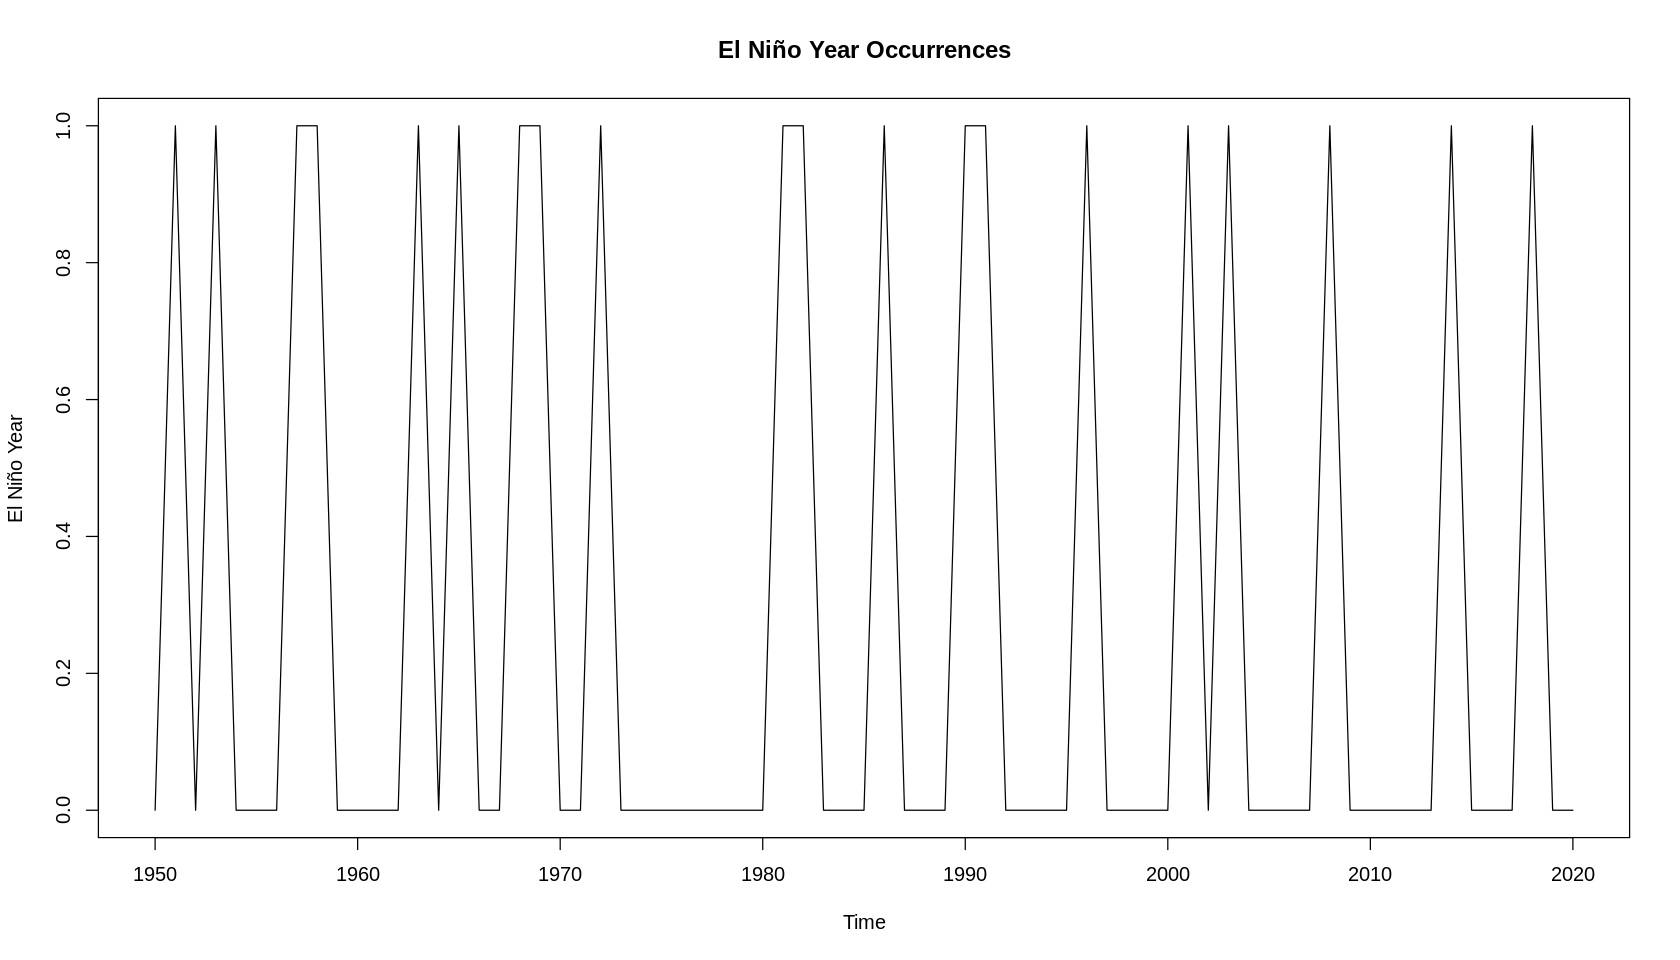

In [150]:
ninoyr_ts <- ts(elninoyr_df$elninoyr, start = c(1950, 1), frequency = 1)
plot(ninoyr_ts, main = "El Niño Year Occurrences", xlab='Time', ylab='El Niño Year')

#### El Niño Years Autocorrelation Plot

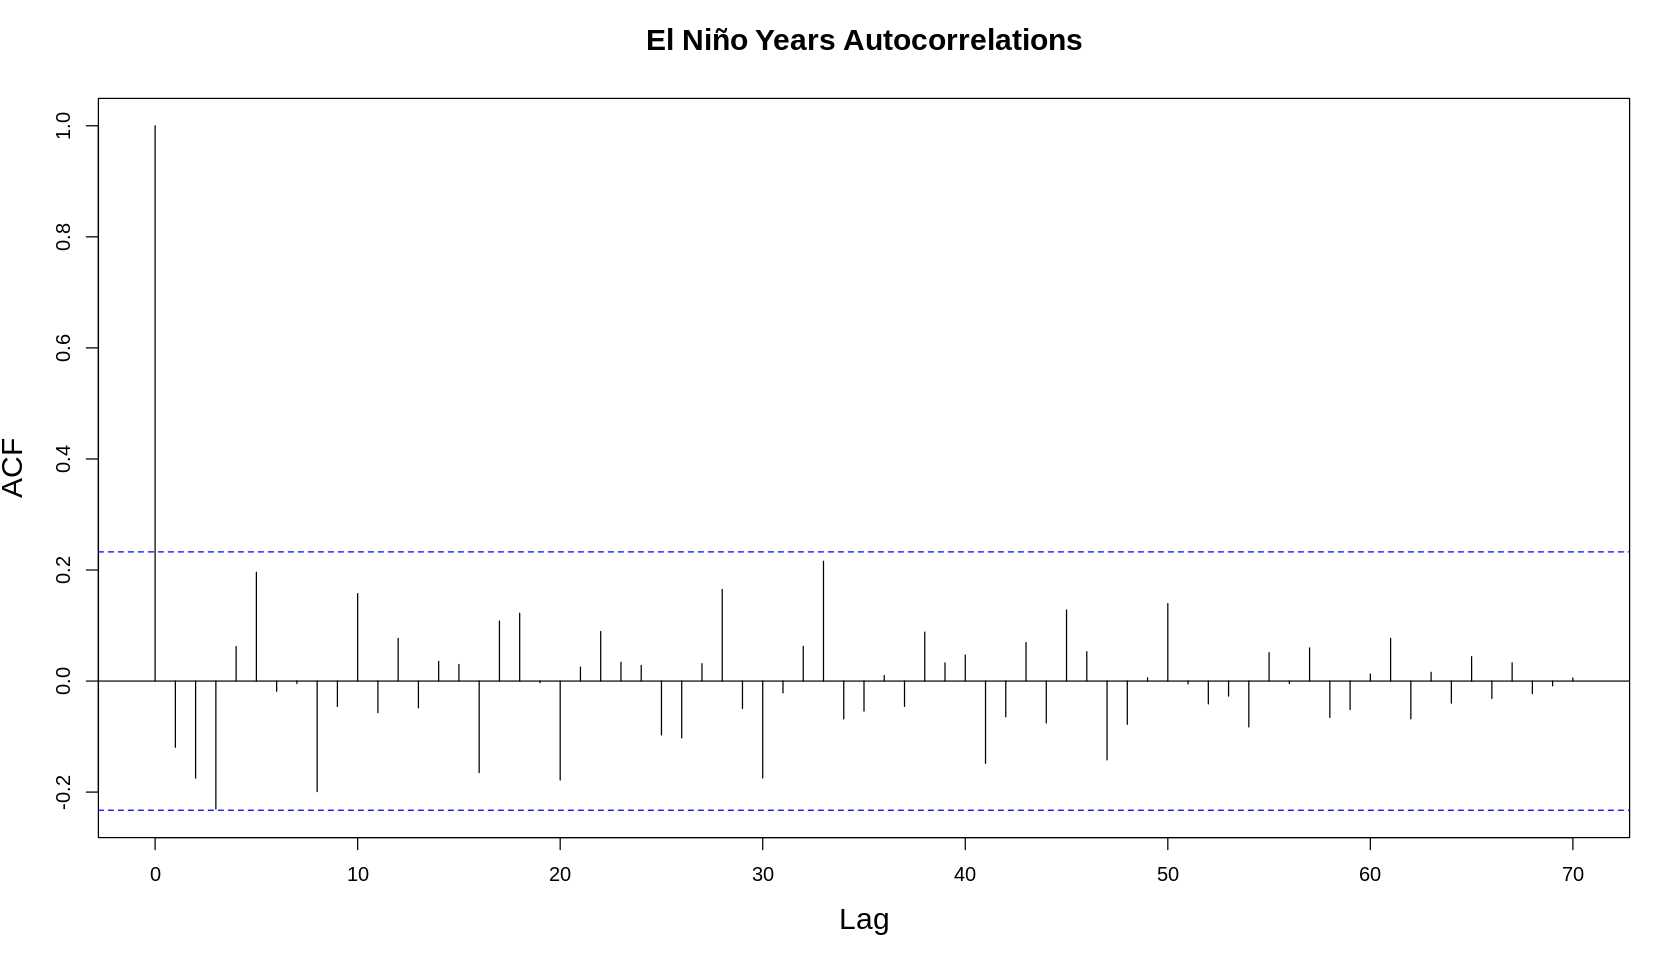

In [151]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
acf(ninoyr_ts, main='El Niño Years Autocorrelations', lag.max=80)

#### El Niño Years Periodogram

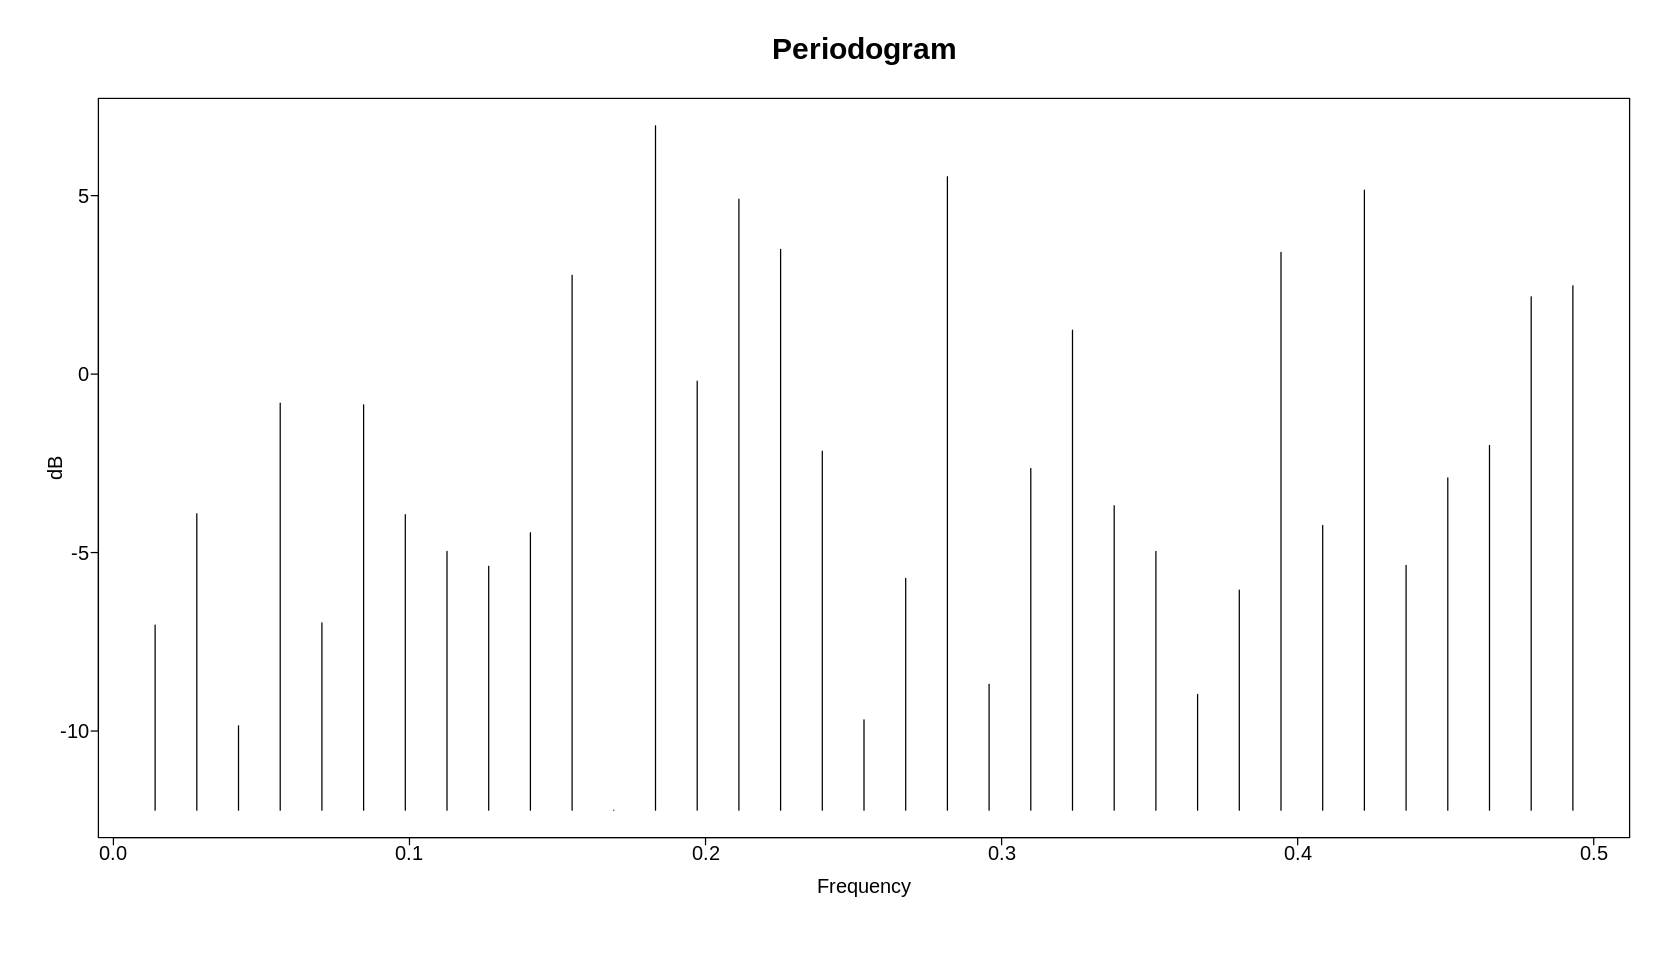

In [152]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
ninoyr_period <- period.wge(ninoyr_ts)

#### El Niño Years Parzen Window

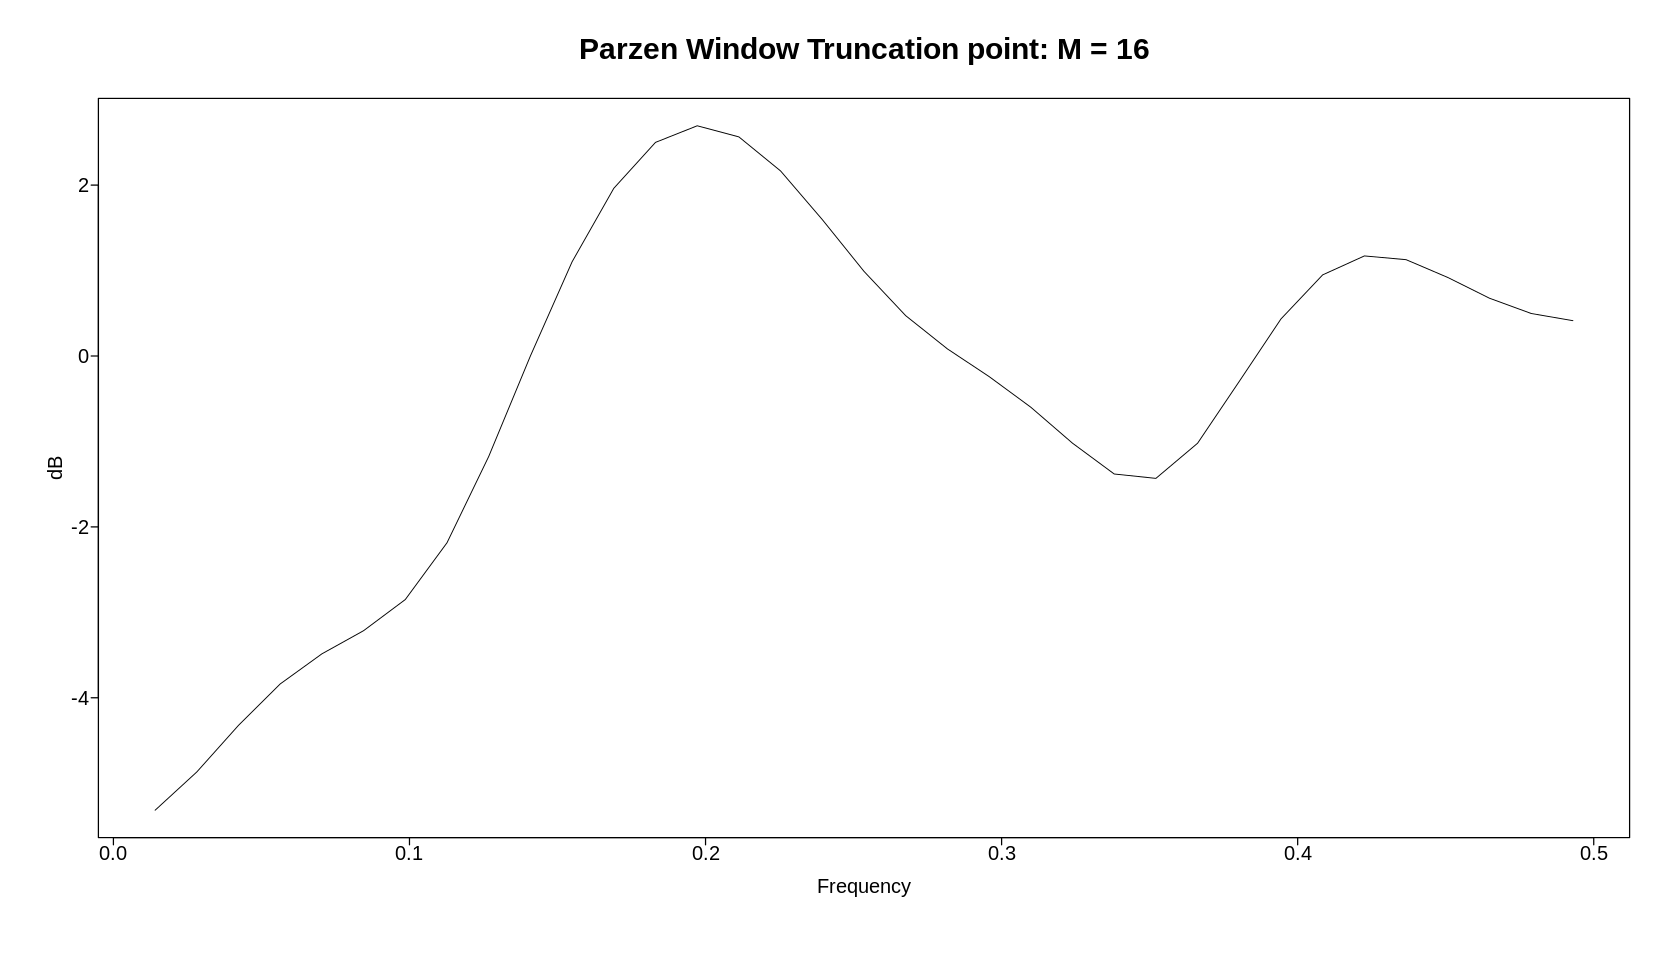

In [153]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
ninoyr_par <- parzen.wge(ninoyr_ts)

#### El Niño Years Periodic/Aperiodic Behavior

In [154]:
max_1 <- which.max(ninoyr_period$pgram)
frequency_1 <- ninoyr_period$freq[max_1]

max_2 <- which.max(ninoyr_period$pgram[0:(max_1-1)])
frequency_2 <- ninoyr_period$freq[max_2]

cat("Period of El Niño Years: ", 1/frequency_1, '\n')
cat("Second period of El Niño Years: ", 1/frequency_2)

Period of El Niño Years:  5.461538 
Second period of El Niño Years:  6.454545

#### El Niño Years Dominant Frequency

In [155]:
cat("Dominant Frequency of El Niño Years: ", frequency_1, '\n')
cat("Second dominant Frequency of El Niño Years: ", frequency_2)

Dominant Frequency of El Niño Years:  0.1830986 
Second dominant Frequency of El Niño Years:  0.1549296

### GDP Analysis

#### GDP Realization Plot

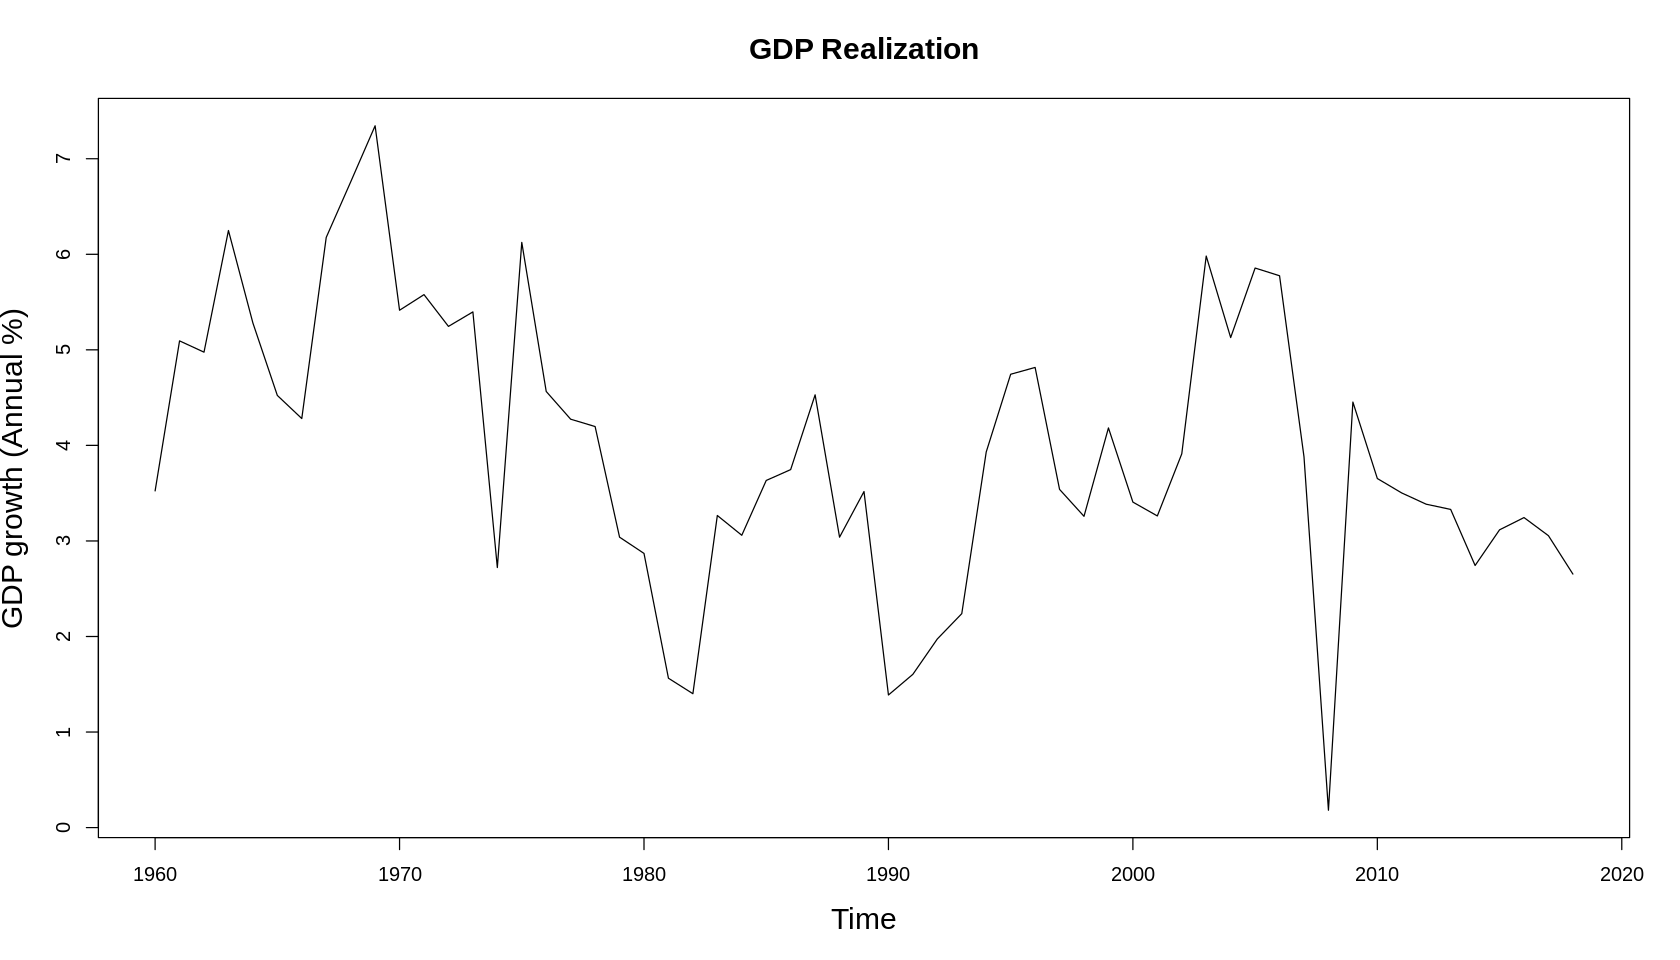

In [156]:
#Plot the ts
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5, cex.sub = 1.5)

gdp_ts <- ts(gdp_df_final$gdp_vec, start = c(1960), frequency = 1)
plot(gdp_ts, main = "GDP Realization", type='l', ylab = 'GDP growth (Annual %)')

#### GDP Autocorrelation Plot

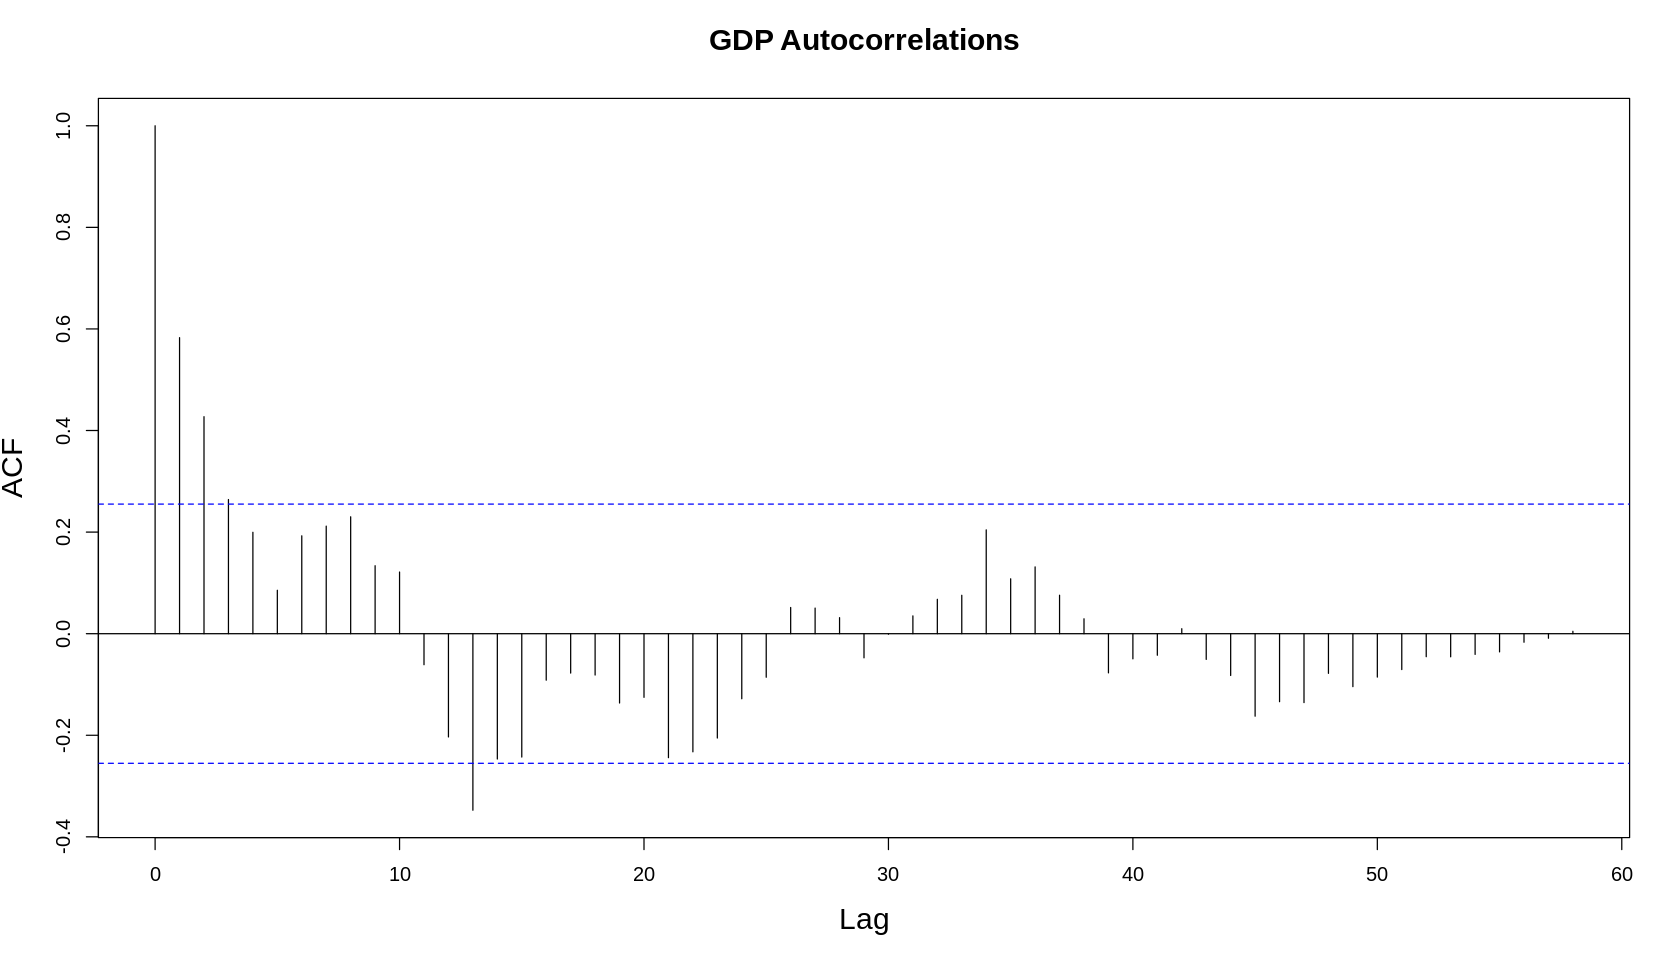

In [157]:
options(repr.plot.width = 14, repr.plot.height = 8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
acf(gdp_ts, main='GDP Autocorrelations', lag.max=80)

#### GDP Periodogram

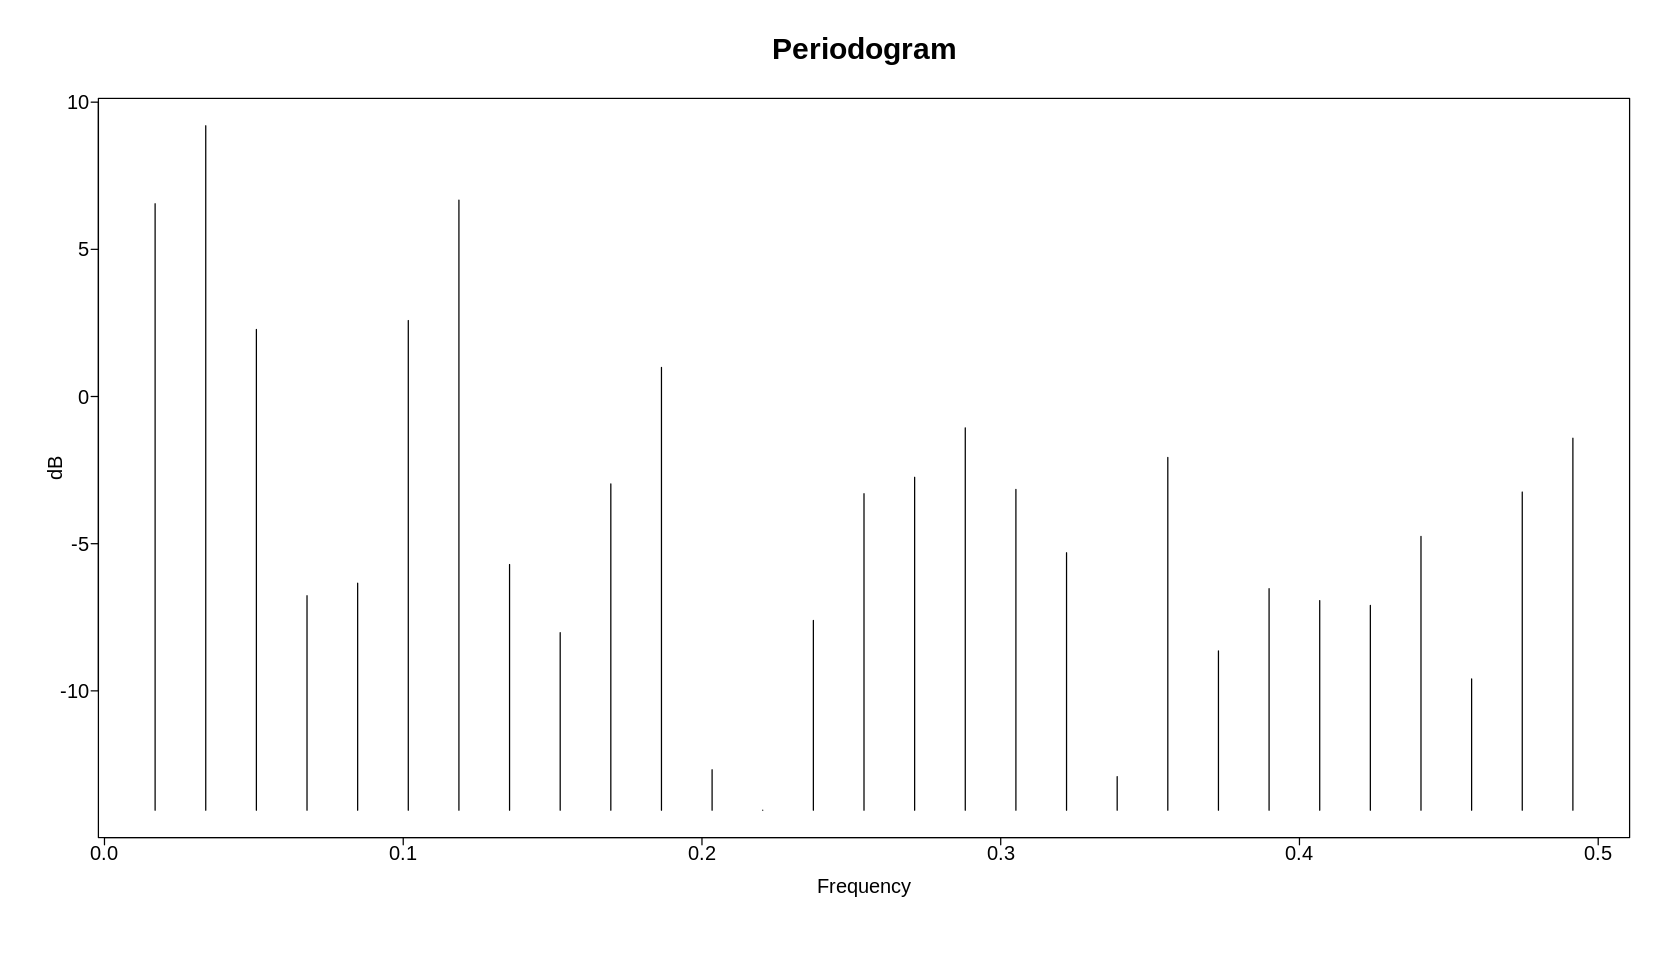

In [158]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
gdp_period <- period.wge(gdp_ts)

#### GDP Parzen Window

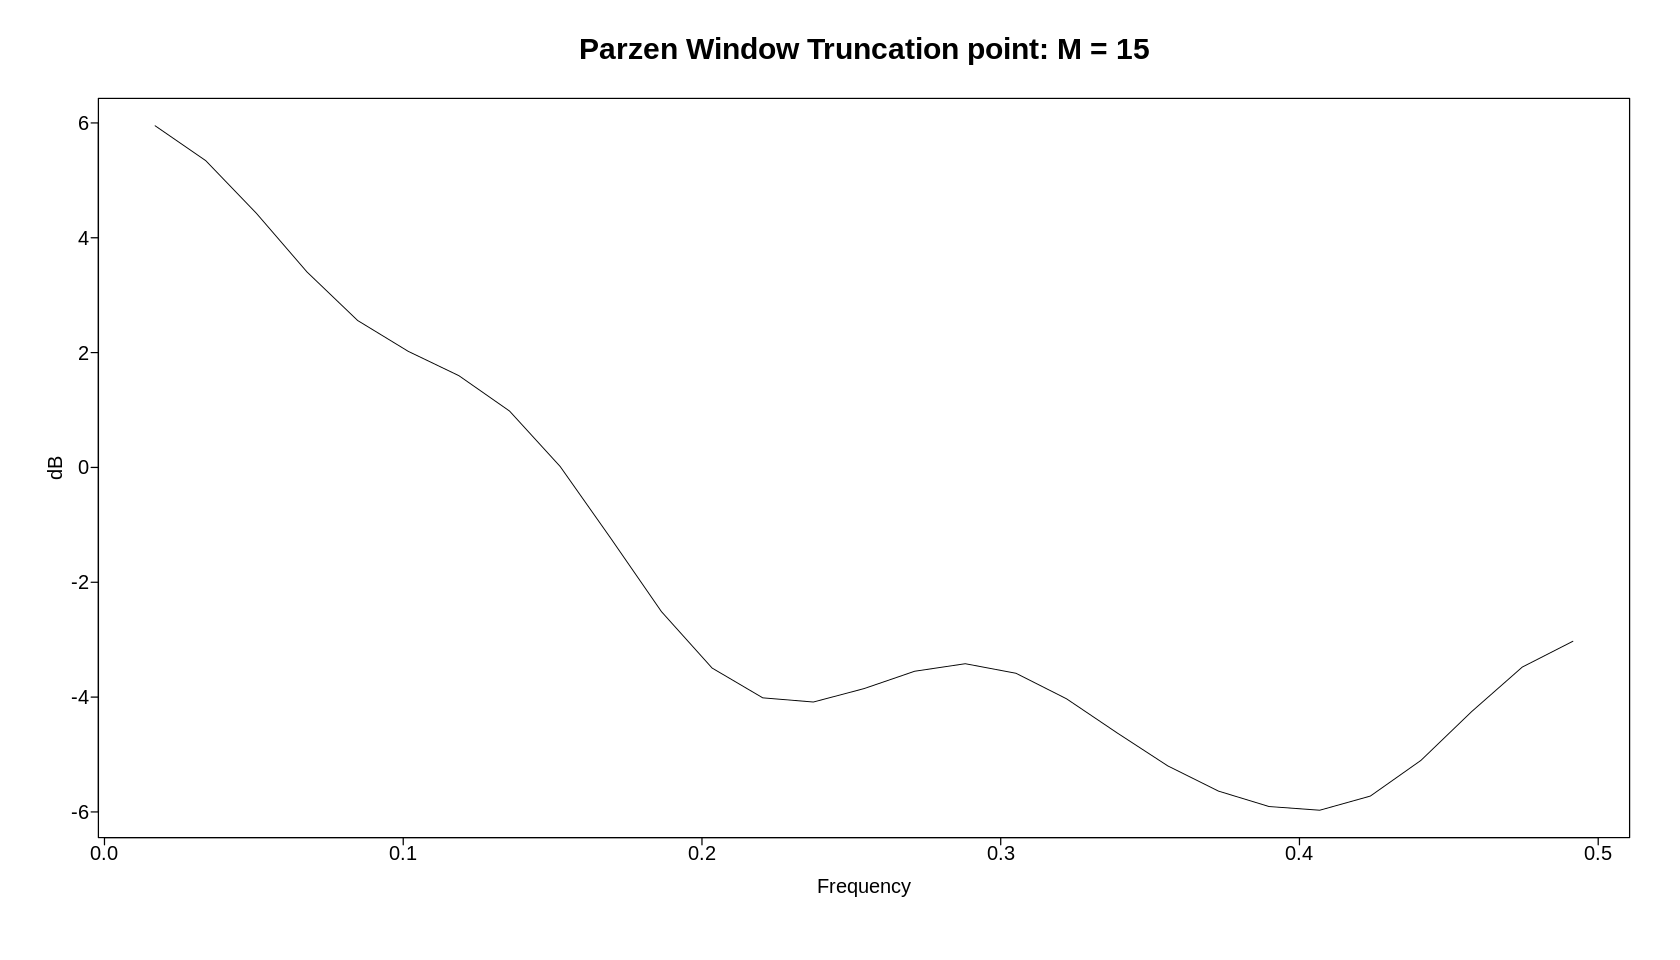

In [159]:
options(repr.plot.width=14, repr.plot.height=8, repr.plot.res = 120)
par(cex.main =  1.5, cex.lab = 1.5)
gdp_par <- parzen.wge(gdp_ts)

#### GDP Periodic/Aperiodic Behavior

In [160]:
max_1 <- which.max(gdp_period$pgram)
frequency_1 <- gdp_period$freq[max_1]

max_2 <- which.max(gdp_period$pgram[0:(max_1-1)])
frequency_2 <- gdp_period$freq[max_2]

cat("Period of GDP: ", 1/frequency_1, '\n')
cat("Second period of GDP: ", 1/frequency_2)

Period of GDP:  29.5 
Second period of GDP:  59

#### GDP Dominant Frequency

In [161]:
cat("Dominant Frequency of GDP: ", frequency_1, '\n')
cat("Dominant Frequency of GDP: ", frequency_2)

Dominant Frequency of GDP:  0.03389831 
Dominant Frequency of GDP:  0.01694915

## Discussion and Conclusions

#### What did I do, and how did the tools work?
Throughout the methods portion of this lab, we pre-processed 5 different data sets for analysis. The data we used that were from the Lam et al. paper included the Oceanic Niño Index (ONI) data, the Multi-variate ENSO Index (MEI) data, and the International Disasters Database (EMDAT) data on persons affected by disasters. The data sets we used that were not in the paper were the worldbank population data and worldbank GDP data. I used the ONI, MEI, EMDAT, and worldbank population data to recreate figure 1 from the Lam et al. paper, which is shown in the "Figure 1 replication from Lam et al." section of the results. The amount of effort put into pre-processing these data sets varied greatly; some, like the ONI data, took only a few lines of code. However, the worldbank data took a lot more code and R knowledge to format it properly for our needs as time series. 

After formatting the data, we visualized our results using realization plots, autocorrelation plots, periodograms, and parzen windows. We used these to investigate general trends, periodic and aperiodic behavior, and the dominant frequency of each time series. These tools allow us to better understand the behavior of our data with respect to time. The realization plots visualize the time series data for us, which is generally useful to identify possible patterns. The sample autocorrelation, which is the natural estimator for the autocorrelation function, can be calculated as $\hat ρ_h=\hat γ_h/ \hat γ_0$ and it gives us valuable insight on how the data could be correlated while taking into account different lag sizes (Woodward et al. (2017). Applied time series analysis with R, p. 20).Periodograms tell us more about the frequency of the data, and if there is any aperiodic/periodic behavior. Lastly, parzen windows serve as windowed spectral estimators (Woodward et al. (2017). Applied time series analysis with R, p. 35). We used the 'tswge' package to actually implement these figures in R. 



#### Patterns present in the data

* The section titled "ONI Analysis" under the results portion shows the steps I took to analyze the ONI data. The plot of the ONI realization has a relatively blatant pattern visible; upon investigating the periodic/aperiodic behavior, we find that the period is 42.65. Given that this period is in months, this means that the period in years is 42.65/12= ~3.55 years. The autocorrelation plot seems to support that there is a relationship when the lag is below 40.
* The section titled "MEI Analysis" under the results portion shows the steps I took to analyze the MEI data. The plot of the MEI realization has a very similar looking pattern to the ONI realization, which means the MEI data likely has periodic behavoir. In the section "MEI periodic/aperiodic behavior", we use the tswge package to get a period of 42.94. Given that this period is in months, this means that the period in years is 42.94/12= ~3.58 years, which makes sense based on the plot. Both the ONI and MEI autocorrelation function plots display this as well, with a fluctuating positive/negative correlation as the lag gets larger; however, as the lag got past about 40, the correlation was nearly zero. The parzen window plot for the MEI time series did show a second sharper peak compared to the ONI data, which may speak to why there is slightly more variation in the MEI realization plot.
* The section titled "PAD Analysis" under the results portion shows my steps taken to analyze the PAD per 1000 data that we preprocessed. The plot of the PAD realization seemed to show that there could be a pattern present in the data; however, the autocorrelation plot showed that there was not a significant relationship even at small lags. The other plots as well as the calculated periods and dominant frequencies did not provide much insight, so I determined these data were largely aperiodic.
* To identify the El Niño years, I used a series of loops and if statements to find the years in which there were 5 or more consecutive months of a .5 ONI or higher. I then visualized the El Niño years realization, and calculated its dominant frequencies and periods. The El Niño years realization seemed to show that there could be periodic behavior present. The first period I calculated was 5.461538, meaning that about every 5.5 years there should an El Niño year. Looking at the plot, a period like this makes sense. However, the autocorrelation plot was somewhat inconclusive with even small lags having very little correlation.
* The section titled "GDP Analysis" under the results portion shows my steps taken to analyze the GDP data that I chose to use. I chose to use GDP because I expected the GDP data to have similar trends to the El Niño year data. The plot of the GDP realization seemed to show that there was likely no pattern present in the data. The autocorrelation plot seemed to agree with this, as even smaller lags had very little autocorrelation. The periodogram and parzen window seemed to concur as well, so it seems like these data were mostly aperiodic.

#### Challenges
The biggest challenges of this lab were getting certain data preprocessed. The PAD/population data were particularly difficult to format, as well as the GDP data. While I have used R a decent amount, I seemed to struggle with these data. I found that the tidyverse library, which provides packages such as dplyr, was immensely helpful for getting these data sets processed. 

Another challenge I experienced was figuring out how to use the tswge package to make the best plots for analysis as possible. It took me a while to figure out how to call the various functions in such a way that I was getting aesthetically pleasing plots with valuable information. Along with this, I found it difficult to calculate the period and frequency at first; in the end, I was able to caculate it for the first 2 dominant frequencies/periods, but after that my calculations didnt seem to reflect what was present on the parzen window plot or the periodogram. 

The last major challenge was finding a data set that could potentially exhibit similar patterns to El Niño years. I tried to find wind speed data for nearly four hours, but ultimately I decided on GDP because there was still potential for a trend but it was much easier to find a GDP data set.

## References

Davis, T. (2021). Applied Time Series Analysis: Course Notebook. The College of William & Mary, Williamsburg VA. https://colab.research.google.com/drive/16vRnZEVY3we9jXIJotyDzVYjXH_gt8VX?usp=sharing

Davis, T. (2021). Applied Time Series Analysis - Code Snippet. Reading and processing data for Lab 1. The College of William & Mary, Williamsburg VA. https://colab.research.google.com/drive/1LQYV32w2alxA8AMwlJC2PHjAyfs58I5M?usp=sharing#scrollTo=DscyF6Xddqta

Lam, H. C., Haines, A., McGregor, G., Chan, E. Y., &amp; Hajat, S. (2019). "Time-Series Study of Associations Between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle." International Journal of Environmental Research and Public Health. https://www.mdpi.com/1660-4601/16/17/3146/htm

Woodward, W. A., Gray, H. L., &amp; Elliott, A. C. (2017). Applied time series analysis with R. Boca Raton, Fla: CRC Press, Taylor &amp; Francis Group.

Woodward, W. (2016). tswge: Applied Time Series Analysis. https://CRAN.R-project.org/package=tswge